# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# **Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Открою файл с данными и изучу общую информацию. 

Открываю файл с данными и вывожу первые 10 строк на экран (при первом открытии выяснилось, что файл формата csv с разделителями в виде `\t`, поэтому в команду открытия файла с данными добавляю `sep = '\t'`)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # выводим все столбцы на экран
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Вывожу общую информацию о датафрейме на экран

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

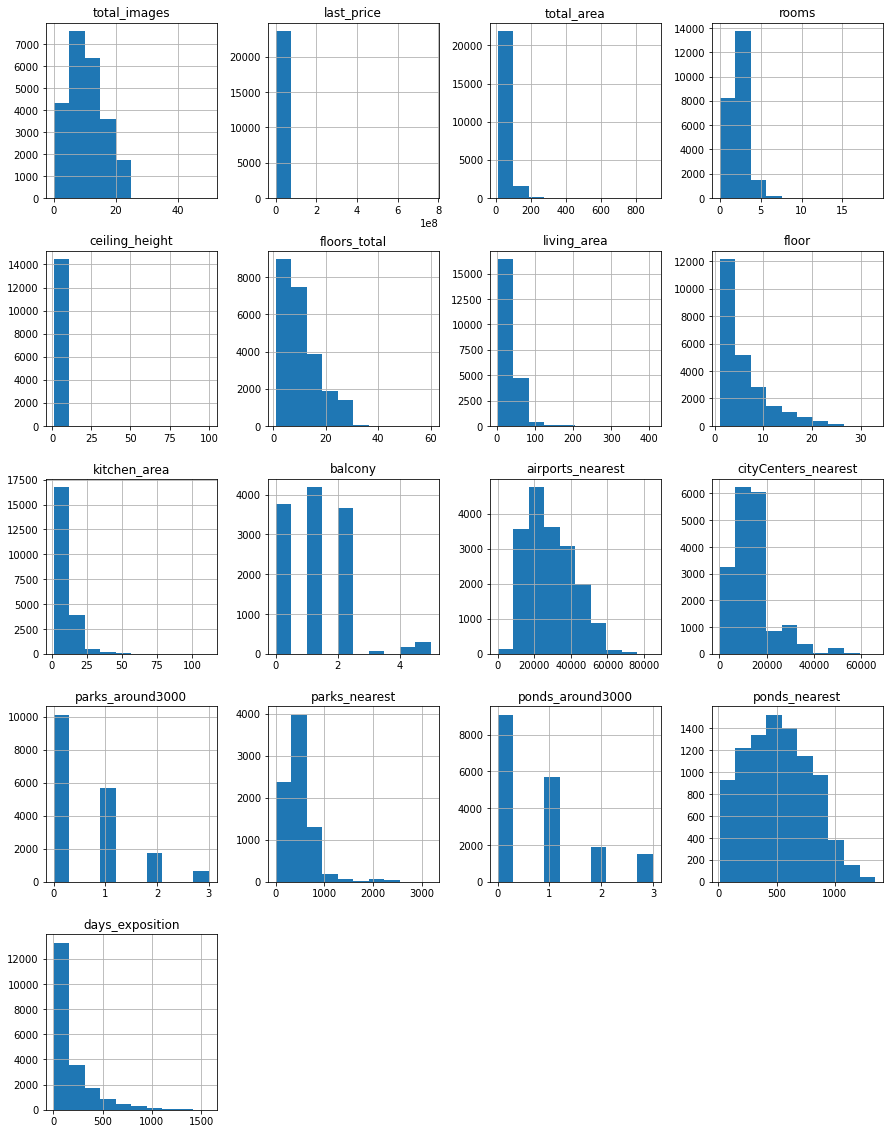

In [4]:
data.hist(figsize=(15, 20))
plt.show()

##### Промежуточный итог 1


<div style="border:solid blue 5px; padding: 20px">
Открыл данные, посмотрел на гистограммы, проверил пропущенные значения. 
    
Видно, что пропущенных значений много и они находятся в следующих столбцах:
- `ceiling_height` — высота потолков (м)
- `floors_total` — всего этажей в доме
- `living_area` — жилая площадь в квадратных метрах (м²)
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `balcony` — число балконов
- `locality_name` — название населённого пункта
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

На гистограммах выше видно, что распределение различных данных самое разное, видно, что есть данные, которые надо будет основательно проанализировать и поправить (например, количество комнат 10-20).
</div>

### Предобработка данных

#### Обработка пропусков в данных

Начну с балконов, как было указано в шапке проекта, если значение пропущено, то, скорее всего балконов нет, поэтому заполняю все пропуски в этом столбце нулями, для начала проверю, сколько таких данных в нём

In [5]:
data['balcony'].isna().sum()

11519

Заменяю все пропуски нулями и снова вывожу количество пропусков в этом столбце, чтобы убедиться, что проработаны все

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Если в графе число парков и водоёмов в радиусе 3 км пропуск, скорее всего их нет рядом, поэтому заполняю пропуски в этих столбцах нулями, предварительно выведя количество пропусков на экран

In [7]:
(print('Количество пропусков в графе парков в радиусе 3 км: ', data['parks_around3000'].isna().sum(),
'\nКоличество пропусков в графе водоёмов в радиусе 3 км: ', data['ponds_around3000'].isna().sum()))

Количество пропусков в графе парков в радиусе 3 км:  5518 
Количество пропусков в графе водоёмов в радиусе 3 км:  5518


In [8]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Проверяю, остались ли пропуски

In [9]:
(print('Количество пропусков в графе парков в радиусе 3 км: ', data['parks_around3000'].isna().sum(),
'\nКоличество пропусков в графе водоёмов в радиусе 3 км: ', data['ponds_around3000'].isna().sum()))

Количество пропусков в графе парков в радиусе 3 км:  0 
Количество пропусков в графе водоёмов в радиусе 3 км:  0


Далее надо уловить, есть ли связь между отсутствием парков/водоёмов в радиусе 3 км и пустым значением в ячейке с расстоянием до ближайшего парка/пруда.
Выведу количество совпадений, когда парков в радиусе 3 км 0, а расстояние до ближайшего парка пропущено:

In [10]:
data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna() == True),'parks_around3000'].count()

15620

Аналогично для водоёмов:

In [11]:
data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna() == True),'ponds_around3000'].count()

14589

Проверю количество пропусков в графе парков/водоёмов рядом

In [12]:
(print('Количество пропусков в графе ближайших парков: ', data['parks_nearest'].isna().sum(),
'\nКоличество пропусков в графе ближайших водоёмов: ', data['ponds_nearest'].isna().sum()))

Количество пропусков в графе ближайших парков:  15620 
Количество пропусков в графе ближайших водоёмов:  14589


Видно, что количество пропусков в графе ближайших парков/водоёмов совпадает с количеством совпадений этих пропусков и отсуствием парка/водоёма поблизости, поэтому логично предположить, что если их нет поблизости, то и расстояния быть не должно, то есть, в этих данных в этих местах необходимо поставить пропуск, в своём случае буду ставить значение `-1`

In [13]:
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)

In [14]:
(print('Количество пропусков в графе ближайших парков: ', data['parks_nearest'].isna().sum(),
'\nКоличество пропусков в графе ближайших водоёмов: ', data['ponds_nearest'].isna().sum()))

Количество пропусков в графе ближайших парков:  0 
Количество пропусков в графе ближайших водоёмов:  0


Если посмотреть на площади, то в глаза бросается факт того, что площадь кухни и жилая площадь в сумме иногда дают значение, которое больше общей площади помещения. Проверю, сколько таких строк в датафрейме и какой это процент от общего массива данных:

In [15]:
strange_area = data.loc[(data['kitchen_area'] + data['living_area']) > data['total_area']]['total_area'].count()
print(f'Количество квартир со странностями в общей площади:{strange_area}, это составляет {strange_area/data.shape[0]:.2%} от всего массива данных')

Количество квартир со странностями в общей площади:64, это составляет 0.27% от всего массива данных


Видно, что таких строк очень мало, поэтому можно удалить их, при этом пока пропуски в столбцах по площади кухни и жилой площади не отбрасываю, чтобы обработать их дальше

In [16]:
data = data.loc[((data['kitchen_area'] + data['living_area']) <= data['total_area']) 
                | (data['kitchen_area'].isna() == True) 
                | (data['living_area'].isna() == True)]
data.reset_index(drop = True) # индексы обновляю
data.shape[0]

23635

Проверю, сколько у нас ситуаций, когда сумма кухни и жилой площади равно общей площади, а сколько таких, когда меньше, чем общая площадь:

In [17]:
equal = data.loc[((data['kitchen_area'] + data['living_area']) == data['total_area']), 'total_area'].count()
less = data.loc[((data['kitchen_area'] + data['living_area']) < data['total_area']), 'total_area'].count()

(print(f'Количество ситуаций, когда сумма жилой площади и площади кухни равна общей площади: {equal}\
\nКоличество ситуаций, когда сумма жилой площади и площади кухни меньше общей площади: {less}'))

Количество ситуаций, когда сумма жилой площади и площади кухни равна общей площади: 70
Количество ситуаций, когда сумма жилой площади и площади кухни меньше общей площади: 20848


Попробую визуализировать данные о разнице общей площади и суммы жилой плозади и площади кухни

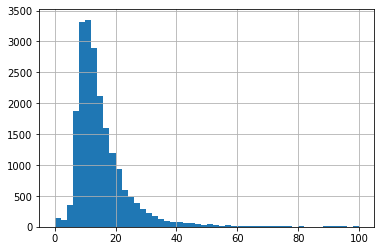

count    20918.000000
mean        15.452489
std         12.126845
min          0.000000
25%          9.500000
50%         12.700000
75%         17.900000
max        378.300000
dtype: float64

In [18]:
data2 = data['total_area'] - (data['kitchen_area'] + data['living_area'])
data2.hist(bins = 50, range = (0,100))
plt.show()
data2.describe()

Видно, что в большинстве своём разница площадей распределена от 9,5 до 17,9 кв.м., поэтому возможности как-то заполнить пропуски в данных по жилой площади и площади кухни нет возможности, поэтому придётся заполнить их пустым значением (чтобы не менять тип данных, буду заполнять значением `-1`).

In [19]:
kitchen_total_ratio = data['kitchen_area'].mean() / data['total_area'].mean() # смотрим отношение средней кухонной площади к средней общей
living_total_ratio = data['living_area'].mean() / data['total_area'].mean() # смотрим отношение средней жилой площади к средней общей

Перед тем, как заменить пропуски на более подходящее значение, проверю, какое распределение имеют кухонная и жилая площади и какая для них характерна статистика, чтобы потом сравнить с тем же, но после замены

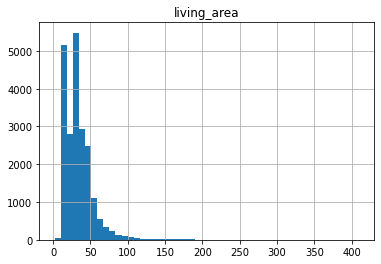

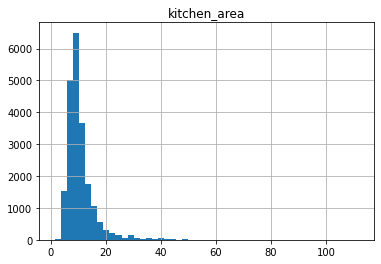

In [20]:
data.hist('living_area', bins = 50)
plt.show()
data.hist('kitchen_area', bins = 50)
plt.show()

In [21]:
data['living_area'].describe()

count    21732.000000
mean        34.439614
std         22.045004
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [22]:
data['kitchen_area'].describe()

count    21357.000000
mean        10.557950
std          5.892814
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [23]:
data['kitchen_area'] = data['kitchen_area'].fillna(-1)
data['living_area'] = data['living_area'].fillna(-1)

Не убирая то, что я заполнил пустые значения для кухонной и жилой площадей значениями `-1`, просто заменяю во всех местах, где они равны ему, значениями произведения общей площади и либо `kitchen_total_ratio`, либо `living_total_ratio`

In [24]:
data.loc[data['kitchen_area'] == -1, 'kitchen_area'] = data['total_area']*kitchen_total_ratio
data.loc[data['living_area'] == -1, 'living_area'] = data['total_area']*living_total_ratio

Проверяю, остались ли пропуски

In [25]:
kitchen = data['kitchen_area'].isna().sum()
living = data['living_area'].isna().sum()

print(f'Количество пропусков в данных по площади кухни: {kitchen}\
\nКоличество пропусков в данных по жилой площади: {living}')

Количество пропусков в данных по площади кухни: 0
Количество пропусков в данных по жилой площади: 0


Отлично, в этих столбцах пропусков не осталось, проверю, как изменились статистика и распределения

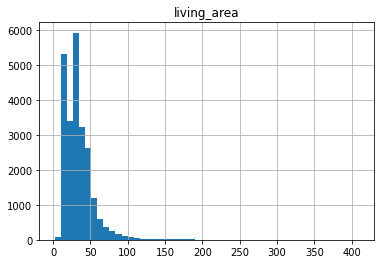

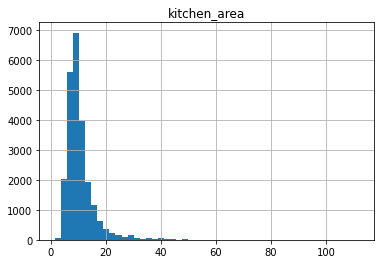

In [26]:
data.hist('living_area', bins = 50)
plt.show()
data.hist('kitchen_area', bins = 50)
plt.show()

In [27]:
data['living_area'].describe()

count    23635.000000
mean        34.574629
std         22.366129
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [28]:
data['kitchen_area'].describe()

count    23635.000000
mean        10.493836
std          6.027910
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Проверю, есть ли ситуации, когда этаж квартиры больше, чем общее количество этажей

In [29]:
data[data['floors_total'] < data['floor']]['floors_total'].count()

0

Таких ситуаций у нас нет, можно не обрабатывать данную проблему

Есть пропуски в значениях `floors_total`, к сожалению, восстановить данные нет возможности, поэтому заполню пропуски пустыми значениями (всё также, заполню значением `-1`), предварительно проверив, сколько их

Чисто гипотетически можно было бы в пропуски с общим количеством этажей `floors_total` вставить значение этажа квартиры `floor`, но это могло бы исказить данные

In [30]:
data['floors_total'].isna().sum()

86

In [31]:
data['floors_total'] = data['floors_total'].fillna(-1)
data['floors_total'].isna().sum()

0

Заполнил пропуски в графе `floors_total` пустыми значениями

Проверю пропуски в колонке ближайших аэропортов: пропуски есть, однако, если исходить из логики, что при отсутствии аэропорта поблизости стоит Nan, заполню этот пропуск пустым значением (значением `-1`). Предварительно проверю, сколько пропусков в этом столбце

In [32]:
data['airports_nearest'].isna().sum()

5522

In [33]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['airports_nearest'].isna().sum()

0

Заполнил пропуски в графе `airports_nearest` пустыми значениями

Далее посмотрю на `studio` и `is_apartment`. В `studio` у нас пропусков нет, все пропуски в `is_apartment`, попробую хотя бы частично заполнить. Держу во внимании, есть ли у нас значения `True` одновременно в обоих этих столбцах

In [34]:
data.loc[(data['studio'] == True) & (data['is_apartment'] == True), 'is_apartment'].count()

0

Таких строк нет, поэтому везде, где `studio = True`, можно смело ставить `is_apartment = False`

Сколько было пар `'studio' = True, 'is_apartment' = False` в изначальной таблицe

In [35]:
data.loc[(data['studio'] == True) & (data['is_apartment'] == False), 'is_apartment'].count()

15

Сколько было пар `'studio' = True и отсутствие данных в 'is_apartment'` в изначальной таблицe

In [36]:
data.loc[(data['studio'] == True) & (data['is_apartment'].isna()), 'studio'].count()

134

Ожидаю, что после заполнения пропусков в этих парах значением 'is_apartment' = False, итоговое количество пар `'studio' = True, 'is_apartment' = False` будет равно 149 (сумма двух предыдущих условий)

In [37]:
data.loc[(data['studio'] == True) & (data['is_apartment'].isna()), 'is_apartment'] = False
data.loc[(data['studio'] == True) & (data['is_apartment'] == False),'is_apartment'].count()

149

Так и получилось, значит замена верная!

Попробую выявить ещё связь в данных `studio` и `is_apartment`, проверю ещё связь с `open_plan`:
> далее для удобства я буду использовать следующие сокращения: 
>  - `studio` = S
>  - `is_apartment` = A
>  - `open_plan` = O

Рассмотрю следующие ситуации: есть ли хоть одна пара из этой троицы, когда оба значения `True`:

In [38]:
O_and_A = data.loc[(data['open_plan'] == True) & (data['is_apartment'] == True) & (data['studio'] == False),'open_plan'].count()
O_and_S = data.loc[(data['open_plan'] == True) & (data['is_apartment'] == False) & (data['studio'] == True),'open_plan'].count()
S_and_A = data.loc[(data['open_plan'] == False) & (data['is_apartment'] == True) & (data['studio'] == True),'open_plan'].count()

(print(f'В паре `open_plan` и `is_apartment` количество строк, где оба значения True равно {O_and_A}\
\nВ паре `open_plan` и `studio` количество строк, где оба значения True равно {O_and_S}\
\nВ паре `studio` и `is_apartment` количество строк, где оба значения True равно {S_and_A}'))

В паре `open_plan` и `is_apartment` количество строк, где оба значения True равно 0
В паре `open_plan` и `studio` количество строк, где оба значения True равно 0
В паре `studio` и `is_apartment` количество строк, где оба значения True равно 0


Если хоть кто-либо из `studio`, `is_apartment` или `open_plan` имеет значение `True`, два других столбца автоматически должны быть `False`, отсюда можно заполнить ещё пропущенные значения `is_apartment` значением `False`, где `open_plan` = `True`. Сначала посчитаю, сколько их было:

In [39]:
data.loc[(data['open_plan'] == True) & (data['is_apartment'].isna()),'open_plan'].count()

60

Заменяю пропуски `is_apartment` в этих строках на значение `False`

In [40]:
data.loc[(data['open_plan'] == True) & (data['is_apartment'].isna()), 'is_apartment'] = False

Проверяю, заменилось ли

In [41]:
data.loc[(data['open_plan'] == True) & (data['is_apartment'].isna()),'open_plan'].count()

0

Далее надо проверить, сколько строк, где все значения  `studio`,`is_apartment`,`open_plan` равны `False`
А также те, где `studio`,`open_plan` оба равны `False`, а `is_apartment` равен `True`

In [42]:
O_and_A_and_S_False = data.loc[(data['open_plan'] ==False) & (data['is_apartment'] == False) & (data['studio'] == False),'open_plan'].count()
O_and_S_not_A_False = data.loc[(data['open_plan'] == False) & (data['is_apartment'] == True) & (data['studio'] == False),'open_plan'].count()

(print(f'Количество строк, где во всех трёх стобцах `studio`,`is_apartment` и `open_plan` значение False: {O_and_A_and_S_False}\
\nКоличество строк, где в паре `studio` и `open_plan` оба значения False, а `is_apartment` = True: {O_and_S_not_A_False}'))

Количество строк, где во всех трёх стобцах `studio`,`is_apartment` и `open_plan` значение False: 2686
Количество строк, где в паре `studio` и `open_plan` оба значения False, а `is_apartment` = True: 50


То есть, имеется ситуация, что если  `studio` и `open_plan` оба False, предсказать значение `is_apartment`, к сожалению, невозможно

In [43]:
data.loc[(data['studio'] == False) & (data['is_apartment'] == True),'is_apartment'].count()

50

In [44]:
data.loc[(data['open_plan'] == False) & (data['is_apartment'] == True),'is_apartment'].count()

50

In [45]:
data.loc[(data['open_plan'] == True) & (data['is_apartment'].isna()) & (data['studio'] == False),'open_plan'].count()

0

In [46]:
data.loc[(data['open_plan'] ==False) & (data['is_apartment'].isna()) & (data['studio'] == False),'open_plan'].count()

20683

Оставшиеся пропуски в данных `is_apartment` (20683) придётся заполнить пустым значением:

In [47]:
data['is_apartment'] = data['is_apartment'].fillna(value = '')

Проверяю, чтобы не осталось пропусков в `is_apartment`:

In [48]:
data['is_apartment'].isna().sum()

0

Значения `cityCenters_nearest` достроить нет возможности, поэтому вставляю пустые значения (`-1`):

In [49]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)

Смотрю, сколько пропусков в столбце с названиями населенного пункта

In [50]:
data['locality_name'].isna().sum()

49

В принципе, их немного, можно либо удалить, либо заполнить пустыми значениями, я не буду разбрасываться данными, поэтому заполню значением `unknown` (восстановить данные не представляется возможным)

In [51]:
data['locality_name'] = data['locality_name'].fillna('unknown')

Осталось обработать пропуски по высоте потолков и количеству дней размещения объявления (от публикации до снятия).

Можно предположить, что если есть пропуск в данных по количеству дней размещения объявления (от публикации до снятия) (далее - дней экспозиции), то данное объявление можно считать активным (его ещё не сняли). Вообще, можно взять максимальное значение суммы даты публикации и количества дней экспозиции, взять её за верхний референс и просто вычесть из него все даты публикации тех строк, где у нас есть пропуски в данных по дням экспозиции, в итоге получим количество дней экспозиции на момент сбора этой статистики.
Но этот метод довольно костыльный, так как неизвестно, сколько прошло дней с момента максимума (дата публикации + количество дней экспозиции) до момента сбора статистики, поэтому придётся оставить пропуски и не трогать их

Что же касается высоты потолков, интересно посмотреть на то, есть ли какая-либо связь между высотой потолков и населенным пунктом или количеством этажей. Начну со статистики по населенным пунктам:

In [52]:
data.groupby('locality_name')['ceiling_height'].describe()

,count,mean,std,min,25%,50%,75%,max
locality_name,,,,,,,,
unknown,14.0,2.990714,0.386870,2.60,2.750,2.875,3.090,4.0
Бокситогорск,2.0,3.900000,1.555635,2.80,3.350,3.900,4.450,5.0
Волосово,19.0,2.531579,0.038044,2.50,2.500,2.500,2.550,2.6
Волхов,58.0,3.151207,3.859235,2.40,2.500,2.580,2.700,32.0
Всеволожск,271.0,2.675535,0.178965,2.00,2.600,2.700,2.750,4.2
...,...,...,...,...,...,...,...,...
село Путилово,2.0,2.550000,0.070711,2.50,2.525,2.550,2.575,2.6
село Рождествено,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
село Русско-Высоцкое,5.0,2.580000,0.027386,2.55,2.550,2.600,2.600,2.6


И для наглядности сравнения, возьму какой-либо крупный населенный пункт (например, Санкт-Петербург) и статистику высот потолков по нему

In [53]:
data.loc[data['locality_name'] == 'Санкт-Петербург', 'ceiling_height'].describe()

count    10079.000000
mean         2.801274
std          1.274845
min          1.000000
25%          2.550000
50%          2.700000
75%          2.870000
max        100.000000
Name: ceiling_height, dtype: float64

Видно, что есть населенные пункты, для которых есть статистика по высоте потолков, а есть те, для которых её нет
Попробую заполнить все отсутствующие данные высоты потолков медианным значением для каждого населённого пункта, а те данные, где высота потолков не будет посчитана (так как в принципе отсутствуют данные по этому населенному пункту), можно будет сначала посчитать и, если их не слишком много, затем просто удалить.

In [54]:
for places in data['locality_name'].unique():
    data.loc[(places == data['locality_name']) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(places == data['locality_name']) & (data['ceiling_height'].isna() == False), 'ceiling_height'].median()

Смотрю, как сильно изменилась статистика для Санкт-Петербурга

In [55]:
data.loc[data['locality_name'] == 'Санкт-Петербург', 'ceiling_height'].describe()

count    15682.000000
mean         2.765090
std          1.023167
min          1.000000
25%          2.600000
50%          2.700000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Видно, что медиана не изменилась, в то время как среднее значение уменьшилось (при этом, видно, что количество данных по городу увеличилось практически в полтора раза с десяти до пятнадцати тысяч!).
Теперь проверю, сколько осталось пропусков в столбце по высотам потолков

In [56]:
data['ceiling_height'].isna().sum()

121

Их совсем мало, поэтому можно удалить их методом `dropna()`, обновить индексы и проверить, остались ли ещё пропуски в данных:

In [57]:
data = data.dropna(subset = ['ceiling_height'])
data.reset_index(drop = True)
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3147
dtype: int64

 ##### Промежуточный итог 2

<div style="border:solid blue 5px; padding: 20px">

Причины появления пропусков:

- нежелание клиента раскрывать данные
- невозможность получить данные
- технические ошибки
- ошибка при копировании/сборе данных
- банальное отсутствие данных
    

Вывод: обработал все пропуски в данных, добившись отсутствия пропусков в них различными способами   
Пропуски в данных, которые я не смог восстановить, я заполнил значениями `-1`. 
    
`livin_area` и `kitchen_area` заполнил значениями относительно `total_area`:
- рассчитал, какое в среднем отношение площади кухни или площади жилой площади к общей площади
- для каждого пропуска площади кухни или жилой площади считал произведение общей площади на среднее отношение площади кухни или  жилой площади к общей площади соответственно
    
    Пропуски в `days_exposition` пришлось оставить так, чтобы потом не ломать голову над значениями с `-1`
    
<div style="border:solid red 3px; padding: 20px">

    Очень важно помнить столбцы, в которых я заполнил пропуски значениями '-1':
- **`floors_total`** — всего этажей в доме
- **`airports_nearest`** — расстояние до ближайшего аэропорта в метрах (м)
- **`cityCenters_nearest`** — расстояние до центра города (м)
- **`parks_nearest`** — расстояние до ближайшего парка (м)
- **`ponds_nearest`** — расстояние до ближайшего водоёма (м)

</div>

#### Обработка типов данных

Для начала снова выведу первые 5 строчек датафрейма и информацию о нём

In [58]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700,16.0,51.000000,8,,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.615,11.0,18.600000,1,,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.700,5.0,34.300000,4,,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.700,14.0,90.690765,9,,False,False,27.802534,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030,14.0,32.000000,13,,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23514 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23514 non-null  int64  
 1   last_price            23514 non-null  float64
 2   total_area            23514 non-null  float64
 3   first_day_exposition  23514 non-null  object 
 4   rooms                 23514 non-null  int64  
 5   ceiling_height        23514 non-null  float64
 6   floors_total          23514 non-null  float64
 7   living_area           23514 non-null  float64
 8   floor                 23514 non-null  int64  
 9   is_apartment          23514 non-null  object 
 10  studio                23514 non-null  bool   
 11  open_plan             23514 non-null  bool   
 12  kitchen_area          23514 non-null  float64
 13  balcony               23514 non-null  float64
 14  locality_name         23514 non-null  object 
 15  airports_nearest   

В первую очередь бросается в глаза формат даты `first_day_exposition` -  `object`, надо изменить на тип `DateTime`

In [60]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.000000,8,,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.600000,1,,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.300000,4,,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.700,14.0,90.690765,9,,False,False,27.802534,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.000000,13,,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Вижу также, что столбец с балконами вещественный, хотя не целого числа балконов не бывает, надо поменять на целочисленный:

In [61]:
data['balcony'] = data['balcony'].astype('int')

Далее смотрю на логические данные, которые имеют тип `object`:
- `is_apartment`

Эти данные были предобработаны по наличию пропусков в них, тип менять не буду, иначе снова будут пропуски. Там все равно значения True/False, которые я могу прописывать отдельно.

Проверяю, поменялось ли всё, что хотел:

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23514 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23514 non-null  int64         
 1   last_price            23514 non-null  float64       
 2   total_area            23514 non-null  float64       
 3   first_day_exposition  23514 non-null  datetime64[ns]
 4   rooms                 23514 non-null  int64         
 5   ceiling_height        23514 non-null  float64       
 6   floors_total          23514 non-null  float64       
 7   living_area           23514 non-null  float64       
 8   floor                 23514 non-null  int64         
 9   is_apartment          23514 non-null  object        
 10  studio                23514 non-null  bool          
 11  open_plan             23514 non-null  bool          
 12  kitchen_area          23514 non-null  float64       
 13  balcony         

##### Промежуточный итог 3



<div style="border:solid blue 5px; padding: 20px">
    
Проверил типы данных, произвел замену некоторых из них (привел время к правильному типу `datetime`, чтобы можно было оперировать с ним, например, производить арифметические операции, а также тип столбца с балконами на целочисленный, так как не может быть не целое число балконов)
</div>

#### Изучение уникальных значений и удаление неявных дубликатов

Рассмотрю уникальные значения в столбце с названиями:

In [63]:
sorted(data['locality_name'].unique())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

Создаю функцию, которая будет заменять значение названия на правильное, если оно есть в списке неправильных

In [64]:
def replace_(name, wrong_name, true_name):
    if name in wrong_name:
        for i in range(0,len(wrong_name)):
            if wrong_name[i] == name:
                 return true_name[i]     

Создам два списка: правильные и неправильные названия, далее иду по всем уникальным значениям названий населенных пунктов, если название встречается в списке неправильных, заменяю его везде на правильное название (оно под тем же индексом в списке правильных названий)

In [65]:
wrong_names = ['Кингисепп', 'Коммунар','Кудрово', 'Любань','Мурино', 'поселок Мурино','городской поселок Янино-1','городской посёлок Павлово','село Павлово',\
               'городской посёлок Рощино','поселок городского типа Рощино','городской посёлок Советский','деревня Фёдоровское',\
               'деревня Гарболово','деревня Зимитицы','деревня Рабитицы','поселок Аннино','поселок Бугры','поселок Возрождение',\
               'поселок Громово','поселок Ильичёво','поселок Кобралово','поселок Коробицыно','поселок Лисий Нос','поселок Мельниково',\
               'поселок Мичуринское','поселок Новый Свет','поселок Петровское','поселок Победа','поселок Поляны','поселок Рябово','поселок Стеклянный',\
               'поселок Сумино','поселок Тельмана','поселок Терволово','поселок городского типа Вырица','поселок городского типа Красный Бор','поселок городского типа Кузьмоловский',\
               'поселок городского типа Лебяжье','садовое товарищество Рахья','поселок городского типа имени Свердлова','поселок станции Вещево',\
               'поселок станции Приветнинское', 'коттеджный поселок Кивеннапа Север', 'коттеджный поселок Счастье']
true_names = ['поселок Кингисеппский', 'поселок Коммунары', 'деревня Кудрово', 'поселок Любань',  'посёлок Мурино', 'посёлок Мурино',\
              'городской посёлок Янино-1', 'посёлок городского типа Павлово', 'посёлок городского типа Павлово', 'посёлок городского типа Рощино',\
              'посёлок городского типа Рощино', 'поселок городского типа Советский', 'городской посёлок Фёдоровское', 'поселок Гарболово',\
              'поселок Зимитицы', 'поселок Рабитицы',  'посёлок Аннино', 'посёлок Бугры', 'посёлок Возрождение','посёлок станции Громово',\
              'посёлок Ильичёво', 'посёлок Кобралово', 'посёлок Коробицыно','посёлок Лисий Нос','посёлок Мельниково','посёлок Мичуринское',\
              'посёлок Новый Свет', 'посёлок Петровское','посёлок Победа', 'посёлок Поляны', 'посёлок городского типа Рябово', 'посёлок Стеклянный',\
               'посёлок Сумино', 'посёлок Тельмана','посёлок Терволово','посёлок городского типа Вырица','посёлок городского типа Красный Бор',\
              'посёлок городского типа Кузьмоловский','посёлок городского типа Лебяжье', 'поселок городского типа Рахья','посёлок городского типа имени Свердлова',\
              'посёлок при железнодорожной станции Вещево','посёлок при железнодорожной станции Приветнинское', 'коттеджный посёлок Кивеннапа Север',\
             'коттеджный посёлок Счастье']

for names in data['locality_name'].unique():
    if names in wrong_names:
        data.loc[data['locality_name'] == names, 'locality_name'] = replace_(names, wrong_names, true_names)

Проверю, исправилось ли

In [66]:
sorted(data['locality_name'].unique())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кириши',
 'Кировск',
 'Колпино',
 'Красное Село',
 'Кронштадт',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Свирьстрой',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Агалатово',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревн

Далее хотелось бы привести данные к немного общему виду и заменить везде `поселок` на `посёлок`. Создам функцию, которая занялась бы этим вопросом.

In [67]:
def rename_(name):
    if 'поселок' in name:
        res = name.split(' ')
        res[0] = 'посёлок'
        return ' '.join(res)
    else:
        return name

In [68]:
for names in data['locality_name'].unique():
    data.loc[data['locality_name'] == names, 'locality_name'] = rename_(names)

In [69]:
sorted(data['locality_name'].unique())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кириши',
 'Кировск',
 'Колпино',
 'Красное Село',
 'Кронштадт',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Свирьстрой',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Агалатово',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Бор',


##### Промежуточный итог 4



<div style="border:solid blue 5px; padding: 20px">
Заменил все дублирующиеся названия на правильные, а также привел к единообразному формату, заменив везде `поселок` на `посёлок`
</div>

#### Поиск редких и выбивающихся значений

Начну с потолков, посмотрю, как среди них распределяются значения (построю гистограмму для значений высоты потолков, которая больше 5 метров (5 метров буду считать отсечкой между нормальной и черечур большой высотой потолка)) 

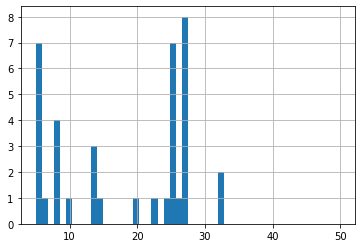

In [70]:
data.loc[data['ceiling_height']>0, 'ceiling_height'].hist(bins = 50, range = (5,50))
plt.show()

Количество таких значений:

In [71]:
data.loc[data['ceiling_height'] > 5, 'ceiling_height'].count()

38

Но ведь потолки могут быть чересчур низкие: буду считать ненормальной высоту потолка меньше двух метров и построю гистограмму для этого случая

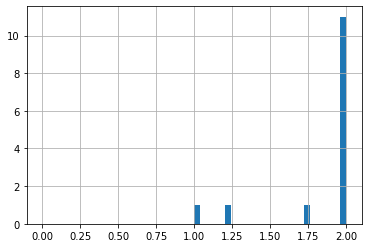

In [72]:
data.loc[data['ceiling_height']>0, 'ceiling_height'].hist(bins = 50, range = (0,2))
plt.show()

Количество таких значений:

In [73]:
data.loc[(data['ceiling_height'] <= 2) & (data['ceiling_height'] >= 0), 'ceiling_height'].count()

14

Думаю, можно просто удалить эти значения, так как их очень мало, чтобы повлиять на данные + обновляю индексы датафрейма:

In [74]:
data = data.loc[(data['ceiling_height'] >2) & (data['ceiling_height'] < 5)]
data.reset_index(drop = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.700,16.0,51.000000,8,,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.615,11.0,18.600000,1,,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.700,5.0,34.300000,4,,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.700,14.0,90.690765,9,,False,False,27.802534,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.030,14.0,32.000000,13,,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23456,9,4600000.0,62.40,2016-08-05,3,2.600,9.0,40.000000,8,,False,False,8.000000,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23457,9,9700000.0,133.81,2017-03-21,3,3.700,5.0,73.300000,3,,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23458,14,3100000.0,59.00,2018-01-15,3,2.500,5.0,38.000000,4,,False,False,8.500000,0,Тосно,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0
23459,13,11475000.0,76.75,2017-03-28,2,3.000,17.0,43.776831,12,,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Проверю соответствующие гистограммы:

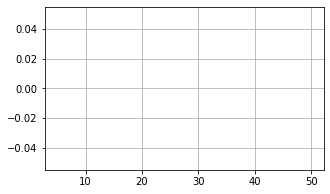

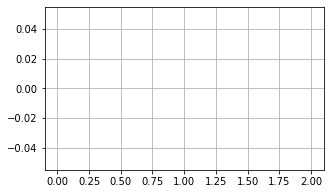

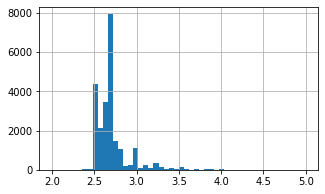

In [75]:
data.loc[data['ceiling_height']>0, 'ceiling_height'].hist(bins = 50, range = (5,50), figsize = (5,3))
plt.show()
data.loc[data['ceiling_height']>0, 'ceiling_height'].hist(bins = 50, range = (0,2), figsize = (5,3))
plt.show()
data.loc[data['ceiling_height']>0, 'ceiling_height'].hist(bins = 50, range = (2,5), figsize = (5,3))
plt.show()

Обратившись к гистограммам в самом начале, замечу, что количество комнат иногда выбивается за пределы нормальных значений, проверю это, посчитав, сколько ненормальных (буду считать ненормальными количество комнат больше пяти), для начала выведу все уникальные значения столбца `rooms`

In [76]:
data['rooms'].value_counts()

1     7962
2     7842
3     5771
4     1175
5      324
0      193
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Теперь посмотрю уникальные значения населённых пунктов, для которых характерно количество комнат 8 и больше

In [77]:
data.loc[data['rooms'] >= 8, 'locality_name'].unique()

array(['Санкт-Петербург', 'Колпино'], dtype=object)

Надо бы проверить, какие значения количества комнат характерны для Колпино:

In [78]:
data.loc[data['locality_name'] == 'Колпино', 'rooms'].value_counts()

2    116
1    103
3     94
4     21
5      2
8      1
Name: rooms, dtype: int64

Аналогично для Санкт-Петербурга:

In [79]:
data.loc[data['locality_name'] == 'Санкт-Петербург', 'rooms'].value_counts()

2     5082
1     4913
3     4110
4      967
5      289
0      109
6       98
7       57
8       11
9        8
10       3
14       2
11       2
12       1
19       1
16       1
15       1
Name: rooms, dtype: int64

Обратившись к внешним источникам, выясню, что в целом, квартиры с комнатами 10-15 и больше бывают, поэтому чисто логически это не должно вызывать вопросов, однако обращусь к общей площади помещения для количества комнат от 7 и выше, сделаю описательную статистику для них (не забыв отбросить значения для площади, равные `-1`):

In [80]:
data.loc[data['living_area'] > -1, 'living_area'].groupby(data['rooms']).describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,193.0,19.409978,14.905753,2.000000,16.000,18.000,19.600000,211.611784
1,7962.0,18.230166,4.888250,3.000000,16.100,17.800,19.200000,281.825829
2,7842.0,31.778331,6.406065,2.000000,28.000,30.500,34.000000,111.794905
3,5771.0,47.332648,11.923905,3.000000,40.900,44.900,51.300000,207.105765
4,1175.0,66.992452,24.734984,5.400000,52.000,63.300,76.400000,285.191084
5,324.0,99.241480,37.029001,23.600000,75.600,91.000,114.607325,301.500000
6,104.0,130.531463,45.159146,51.000000,100.700,122.635,152.875000,300.000000
7,59.0,166.872616,72.107922,57.380446,118.350,147.200,208.103934,359.911148
8,12.0,168.683333,41.550623,107.000000,152.400,161.000,179.200000,260.000000


Видно, есть много несостыковок в данных, то количество комнат слишком огромное для имеющейся жилой площади, то сама жилая площадь не подходит под не самое большое количество комнат. Для начала отброшу все данные, для которых количество комнат больше пяти и снова взгляну на статистику

In [81]:
data = data.loc[data['rooms'] <= 5]
data.loc[data['living_area'] > -1, 'living_area'].groupby(data['rooms']).describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,193.0,19.409978,14.905753,2.0,16.0,18.0,19.600000,211.611784
1,7962.0,18.230166,4.888250,3.0,16.1,17.8,19.200000,281.825829
2,7842.0,31.778331,6.406065,2.0,28.0,30.5,34.000000,111.794905
3,5771.0,47.332648,11.923905,3.0,40.9,44.9,51.300000,207.105765
4,1175.0,66.992452,24.734984,5.4,52.0,63.3,76.400000,285.191084
5,324.0,99.241480,37.029001,23.6,75.6,91.0,114.607325,301.500000


Теперь надо посмотреть и отсеять данные, где количество комнат не подходит под имеющуюся площадь помещения. Преположу, что минимальная площадь комнаты будет 5 кв.м. Попробую посмотреть, сколько вариантов квартир, где размер жилой площади не соответствует минимальным требованиям (при этом не забываю, что много пропусков в жилой площади (их пометил как `-1`), которые дают отрицательную статистику):

In [82]:
data.loc[(data['rooms']*5 >  data['living_area']) & (data['living_area'] > -1), 'rooms'].count()

13

Отброшу эти данныи и нулевое количество комнат, так как это довольно странно:

In [83]:
data = data.loc[((data['rooms']*5 <  data['living_area']) & (data['living_area'] > -1)) | (data['living_area'] == -1)]
data = data.loc[data['rooms'] != 0]

На всякий случай проверю, есть ли данные, когда минимальная общая площадь комант больше, чем разница общей и кухонной площадей (исключая те строки, где у нас пропуски кухонной площади, котоыре обозначены `-1`)

In [84]:
data.loc[((data['rooms'] * 5) >  (data['total_area'] - data['kitchen_area'])) & (data['kitchen_area'] > -1), 'rooms'].count()

0

Комнаты проверил, осталось убедиться, нет ли строк, в которых площадь кухни больше общей площади помещения:

In [85]:
data.loc[(data['kitchen_area'] > data['total_area']) & (data['kitchen_area'] > -1), 'living_area'].count()

0

Я уже проверял и отбрасывал эти данные, на всякий случай повторил и убедился, что таких данных нет, то есть, можно быть спокойным, что ни по площадям, ни по комнатам странных данных не осталось (за исключением пропусков, в которых площадь приравнена к `-1`)

Проверю вообще общую площадь помещений, как распределены даные:

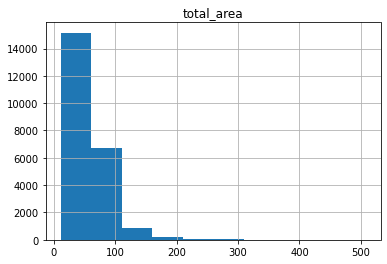

In [86]:
data.hist('total_area')
plt.show()

Видно, что есть значения от 0 до 500 квадратных метров. Посмотрю, в каких населённых пунктах квартиры больше двухсот квадратов и сколько вообще таких значений:

In [87]:
data.loc[data['total_area'] > 200, 'locality_name'].unique()

array(['Санкт-Петербург', 'Пушкин', 'Красное Село', 'Сестрорецк',
       'Сертолово', 'деревня Хязельки', 'посёлок Стрельна'], dtype=object)

In [88]:
data.loc[data['total_area'] > 200, 'locality_name'].count()

115

В принципе, их довольно мало, поэтому можно отбросить, не особо вникая, где такие квартирищи возможны, а где нет (также обновляю индексы в датафрейме)

In [89]:
data = data.query('total_area <= 200')
data.reset_index(drop = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.700,16.0,51.000000,8,,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.615,11.0,18.600000,1,,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.700,5.0,34.300000,4,,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.700,14.0,90.690765,9,,False,False,27.802534,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.030,14.0,32.000000,13,,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22941,9,4600000.0,62.40,2016-08-05,3,2.600,9.0,40.000000,8,,False,False,8.000000,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
22942,9,9700000.0,133.81,2017-03-21,3,3.700,5.0,73.300000,3,,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
22943,14,3100000.0,59.00,2018-01-15,3,2.500,5.0,38.000000,4,,False,False,8.500000,0,Тосно,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0
22944,13,11475000.0,76.75,2017-03-28,2,3.000,17.0,43.776831,12,,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Рассмотрю количество этажей. Для начала проверю, есть ли строки, в которых этаж квартиры выше, чем общее количество этажей

In [90]:
data.loc[(data['floor'] > data['floors_total']) & (data['floors_total'] > -1), 'floor'].count()

0

Таких значений нет. Посмотрю на распределение общего количества этажей:

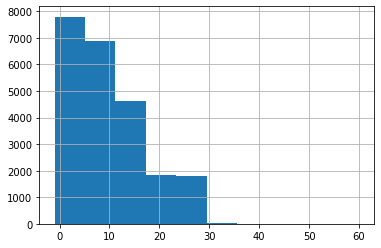

In [91]:
data['floors_total'].hist()
plt.show()

Видно, что есть количество этажей 30 и больше, посмотрю, о каких населенных пунктах идёт речь. Даже для Петербурга это чересчур, так как самое высокое **жилое** здание в нём насчитывает 37 этажей.

In [92]:
data.query('floors_total > 30')['locality_name'].unique()

array(['Санкт-Петербург', 'Кронштадт'], dtype=object)

Видим, что это Петербург и Кронштадт (информации по этажам в Кронштадте я не нашёл, однако, буду отталкиваться от того, что Петербург во много раз крупнее его, поэтому в Кронштадте таких высоких этажей в принципе быть не может. Отбрасываю эти значения этажей как не совсем реальные, перед этим посчитаю, сколько их вообще было)

In [93]:
data.loc[data['floors_total'] > 30, 'floors_total'].count()

27

Их совсем мало, спокойно отбрасываю их и обновляю индексы. Далее необходимо взглянуть на населённые пункты, в которых встречаются дома с количеством этаже 25 и больше:

In [94]:
data = data.loc[data['floors_total'] <= 30]
data.reset_index(drop = True)
data.query('floors_total >= 25')['locality_name'].unique()

array(['посёлок Парголово', 'посёлок Мурино', 'деревня Кудрово',
       'посёлок Шушары', 'Санкт-Петербург', 'посёлок Бугры',
       'посёлок городского типа имени Свердлова',
       'посёлок городского типа Дубровка', 'посёлок Новогорелово',
       'деревня Новое Девяткино'], dtype=object)

Сложно представить, что в посёлке или деревне будет домина в 25+ этажей, поэтому придётся отбросить и эти данные, но сначала посчитаю, сколько их:

In [95]:
not_needed = pd.Series(['посёлок Парголово', 'посёлок Мурино', 'деревня Кудрово',
       'посёлок Шушары', 'посёлок Бугры',
       'посёлок городского типа имени Свердлова',
       'посёлок городского типа Дубровка', 'посёлок Новогорелово',
       'деревня Новое Девяткино'])
data.query('(locality_name in @not_needed) & (floors_total >= 25)')['floors_total'].count()

486

Отбрасываю их и обновляю индексы датафрейма, а также проверяю, остались ли они в данных по этажам 25 и выше:

In [96]:
data = data.query('((locality_name in @not_needed) & (floors_total < 25)) | \
           (~(locality_name in @not_needed))')

data.reset_index(drop = True)
data.query('floors_total >= 25')['locality_name'].unique()

array(['Санкт-Петербург'], dtype=object)

Видно, что остался только Санкт-Петербург, всё отлично! Буду считать, что дома ниже 25 этажей могут присутствовать в посёлках

Взгляну на цену:

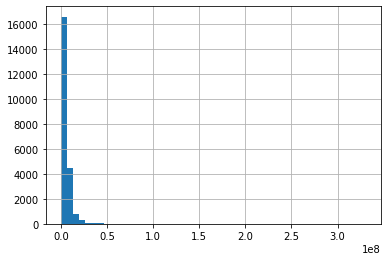

In [97]:
data['last_price'].hist(bins = 50)
plt.show()

Видно, что есть строки, в которых стоимость больше 50 млн руб, выведу их и их количество на экран:

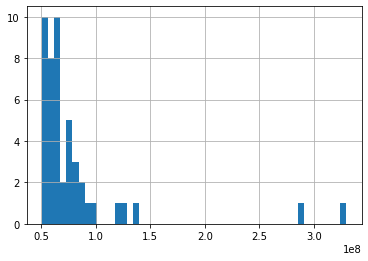

47

In [98]:
data.query('last_price > 50000000')['last_price'].hist(bins = 50)
plt.show()
data.query('last_price > 50000000')['last_price'].count()

Посмотрю, к ками населённым пунктам они относятся:

In [99]:
data.query('last_price > 50000000')['locality_name'].unique()

array(['Санкт-Петербург'], dtype=object)

А также площади квартир, которые продаются по этой цене:

In [100]:
data.query('last_price > 50000000').pivot_table(index = 'last_price', columns = 'locality_name', values = 'total_area')

locality_name,Санкт-Петербург
last_price,
50788000.0,161.00
51000000.0,126.00
52000000.0,132.55
53000000.0,90.00
54000000.0,162.95
55800000.0,125.00
55845000.0,124.10
55969724.0,181.00
56844500.0,177.90


В целом, возможно, для Санкт-Петербурга цены нормальные, но что-то совсем заоблачные, поэтому на всякий случай отброшу их, тем более их не очень много, и проверю, отбросились ли

In [101]:
data = data.query('last_price < 50000000')
data.query('last_price > 50000000')['last_price'].count()

0

Как видно, все подозрительные цены ушли, обновлю индексы датафрейма и выведу информацию о нём на экран

In [102]:
data.reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22380 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22380 non-null  int64         
 1   last_price            22380 non-null  float64       
 2   total_area            22380 non-null  float64       
 3   first_day_exposition  22380 non-null  datetime64[ns]
 4   rooms                 22380 non-null  int64         
 5   ceiling_height        22380 non-null  float64       
 6   floors_total          22380 non-null  float64       
 7   living_area           22380 non-null  float64       
 8   floor                 22380 non-null  int64         
 9   is_apartment          22380 non-null  object        
 10  studio                22380 non-null  bool          
 11  open_plan             22380 non-null  bool          
 12  kitchen_area          22380 non-null  float64       
 13  balcony         

Взгляну на позиции по количеству ближайших парков и водоёмов:

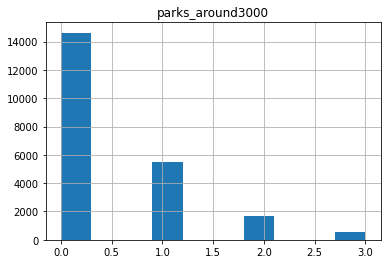

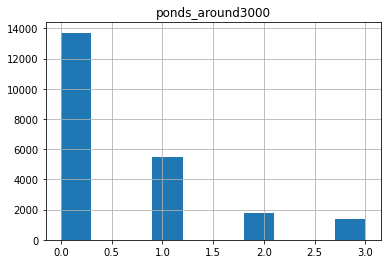

In [103]:
data.hist('parks_around3000', bins = 10)
plt.show()
data.hist('ponds_around3000', bins = 10)
plt.show()

In [104]:
data['parks_around3000'].value_counts()

0.0    14631
1.0     5522
2.0     1652
3.0      575
Name: parks_around3000, dtype: int64

In [105]:
data['ponds_around3000'].value_counts()

0.0    13714
1.0     5501
2.0     1804
3.0     1361
Name: ponds_around3000, dtype: int64

Данные выглядят вполне прилично, рассмотрю, есть ли какие-то аномалии в столбцах с расстоянием до ближайшего парка/водоёма:
1. Оно не должно превышать 3000 м, если в столбце `ponds_around3000` или `parks_around3000` есть хотя бы один парк/водоём
2. Если рядом парков/водоёмов нет (`ponds_around3000` или `paarks_around3000` равны нулю), тогда расстояние до ближайшего не должно быть меньше 3000 м

In [106]:
ponds_too_far_to_be_nearest = data.query('(ponds_around3000 > 0) & (ponds_nearest > 3000)')['ponds_nearest'].count()
parks_too_far_to_be_nearest = data.query('(parks_around3000 > 0) & (parks_nearest > 3000)')['parks_nearest'].count()
ponds_too_close_to_be_far = data.query('(ponds_around3000 == 0) & (ponds_nearest <= 3000) & (ponds_nearest > -1)')['ponds_nearest'].count()
parks_too_close_to_be_far = data.query('(parks_around3000 == 0) & (parks_nearest <= 3000) & (parks_nearest > -1)')['parks_nearest'].count()

print(f'Количество строк, в которых ближайший водоём дальше 3 км, при этом в столбце водоёмов в радиусе 3 км ненулевое значение: {ponds_too_far_to_be_nearest}\
\nКоличество строк, в которых ближайший парк дальше 3 км, при этом в столбце парков в радиусе 3 км ненулевое значение: {parks_too_far_to_be_nearest}\
\nКоличество строк, в которых ближайший водоём ближе 3 км, при этом в столбце парков в радиусе 3 км нулевое значение: {ponds_too_close_to_be_far}\
\nКоличество строк, в которых ближайший парк ближе 3 км, при этом в столбце парков в радиусе 3 км нулевое значение: {parks_too_close_to_be_far}')

Количество строк, в которых ближайший водоём дальше 3 км, при этом в столбце водоёмов в радиусе 3 км ненулевое значение: 0
Количество строк, в которых ближайший парк дальше 3 км, при этом в столбце парков в радиусе 3 км ненулевое значение: 0
Количество строк, в которых ближайший водоём ближе 3 км, при этом в столбце парков в радиусе 3 км нулевое значение: 0
Количество строк, в которых ближайший парк ближе 3 км, при этом в столбце парков в радиусе 3 км нулевое значение: 0


Видно, что несостыковок в этих данных нет, исправлять ничего не требуется

Посмотрю на данные по количеству балконов:

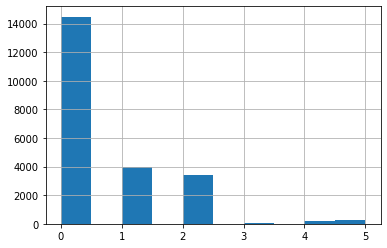

In [107]:
data['balcony'].hist()
plt.show()

In [108]:
data['balcony'].value_counts()

0    14478
1     3958
2     3399
5      293
4      176
3       76
Name: balcony, dtype: int64

Посмотрю на населённые пункты, в которых есть квартиры с 3-5 балконами, сделаю сводную таблицу, строки которой займут населённые пункты, в которых есть квартиры с 3, 4 или 5 балконами, столбцы - собственно, количество балконов (3, 4 или 5), а значениями будет среднее значение `rest_area`(остаточной площади) помещения с таким количеством балконов в этом населенном пункте (пункт `rest_area` - это пункт, в который внесу разницу между общей площадью и суммой кухонной и жилой площадей, т.е. остаток площади, который может прийтись на балконы, а далее рассчитаю среднее по нему для данных количеств балконов и населенных пунктов):

In [109]:
data['rest_area'] = data['total_area'] - (data['kitchen_area'] + data['living_area'])
data.query('balcony > 2').pivot_table(index = 'locality_name', columns = 'balcony', values = 'rest_area', aggfunc = 'mean')

balcony,3,4,5
locality_name,,,
unknown,NaN,18.100000,NaN
Волхов,NaN,9.500000,11.800000
Всеволожск,22.475000,14.363080,25.019903
Выборг,14.400000,12.000000,NaN
Гатчина,NaN,13.350000,22.692341
Ивангород,15.917834,NaN,NaN
Кириши,NaN,12.000000,19.000000
Кировск,12.500000,20.000000,16.066667
Колпино,13.600000,12.350000,18.714286


Как видно, во многих местах чисто гипотетически количество балконов подпадает под примерную общую остаточную площадь помещения, но в остаток входят: коридор, ванная комната, туалет и пр., поэтому данные все равно выглядят странновато, лучше отбросить данные с 4 и 5 балконами, 3 балкона можно оставить. После отбрасывания проверяю, остались ли данные с 4 и 5 балконами и обновляю индексы.

In [110]:
data = data.loc[data['balcony'] <= 3]
data.reset_index(drop = True)
data.loc[data['balcony'] > 3, 'balcony'].count()

0

Теперь посмотрю на данный по дням размещения объявления, сначала выведу разброс этих данных с помощью hist():

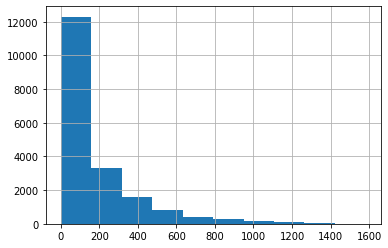

In [111]:
data['days_exposition'].hist()
plt.show()

Далее интересно было бы посмотреть, если сумма года публикации объявления и количества лет, сколько оно провисело (`days_exposition`), будет выходить за рамки каких-то адекватных значений.
Для этого сначала в переменную `year` положу значения столбца `days_exposition`, выраженные в годах (делю на 365), в переменную `year_first` положу год публикации объявления. Если эти две переменные сложить, получится год окончания действия объявления. Построю гистограмму от суммы годов

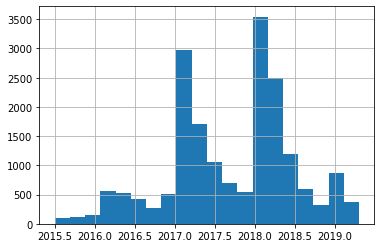

In [112]:
year = data['days_exposition'] / 365
years_first = pd.DatetimeIndex(data['first_day_exposition']).year
year = year + years_first
year.hist(bins = 20)
plt.show()

Видно, что годы не переваливают за 2020, поэтому с данными в днях экспозиции, скорее всего всё хорошо (за исключением, конечно, того, что в них есть пропуски. Кстати, наблюдаю пики приходящиеся на начало каждого из годов, начиная с 2017 и их падение к концу этих же годов)

Осталось проверить две позиции: `airports_nearest` и `cityCenters_nearest`. Построю для них гистограммы:

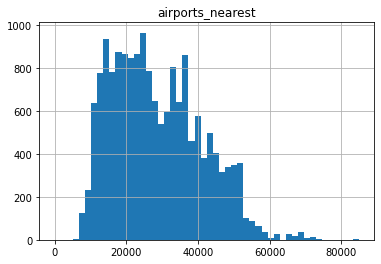

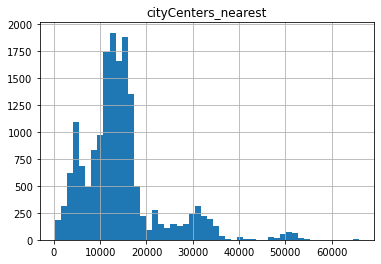

In [113]:
data.query('airports_nearest > -1').hist('airports_nearest', bins = 50)
plt.show()
data.query('cityCenters_nearest > -1').hist('cityCenters_nearest', bins = 50)
plt.show()

Видно, что расстояние до аэропорта не превышает адекватных значений, что также можно, возможно, сказать и про расстояние до центра города, но на всякий случай взгляну на статистику в диапазоне от 0 до 20 км:

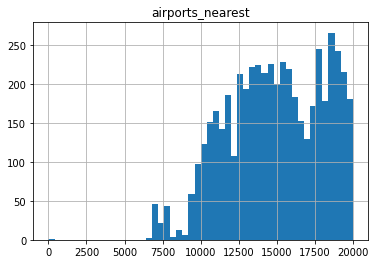

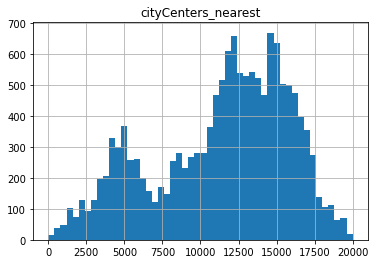

In [114]:
data.query('airports_nearest > -1').hist('airports_nearest', bins = 50, range = (0, 20000))
plt.show()
data.query('cityCenters_nearest > -1').hist('cityCenters_nearest', bins = 50, range = (0, 20000))
plt.show()

Видно, есть один маленький выброс с расстоянием до аэропорта, равным 0 м (до центра города вполне может быть 0 м, если место условно считается центром). Посмотрю, сколько вообще данных расстояния до аэропорта лежит в диапазоне от 0 до 5 км (включая обе точки)

In [115]:
data.query('(airports_nearest <= 5000) & (airports_nearest > -1)')['airports_nearest'].count()

1

Думаю, можно спокойно удалить это несчастное значение, обновить индексы и вывести информацию о таблице

In [116]:
data = data.query('(airports_nearest > 5000) | (airports_nearest == -1)')
data.reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21910 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21910 non-null  int64         
 1   last_price            21910 non-null  float64       
 2   total_area            21910 non-null  float64       
 3   first_day_exposition  21910 non-null  datetime64[ns]
 4   rooms                 21910 non-null  int64         
 5   ceiling_height        21910 non-null  float64       
 6   floors_total          21910 non-null  float64       
 7   living_area           21910 non-null  float64       
 8   floor                 21910 non-null  int64         
 9   is_apartment          21910 non-null  object        
 10  studio                21910 non-null  bool          
 11  open_plan             21910 non-null  bool          
 12  kitchen_area          21910 non-null  float64       
 13  balcony         

##### Промежуточный итог 5

<div style="border:solid blue 5px; padding: 20px">

    Рассмотрел все аномальные значения в количественных столбцах:
- выяснил, есть ли аномалии в высоте потолков (от слишком низких до слишком высоких) и исправил их
- рассмотрел комнаты и балконы (их аномальные количества), удалил все данные, где их слишком много (при этом рассмотрел связь с площадями помещения, есть ли вообще место для них, исходя из данных)
- рассмотрел моменты несостыковки площадей (если вдруг сумма площади кухни и жилой площади больше, чем площадь общая) и исправил их
- рассмотрел аномалии в количестве этажей, где их слишком много, где несостыковки с населенными пунктами и удалил их
- удалил цены на квартиры, которые были выше 50 млн рублей, как слишком высокие
- рассмотрел аномалии в ближайших парках и водоёмах (если, например, есть в радиусе 3 км, то не превышает ли расстояние до ближайшего эти самые 3км, и наоборот, если нет ничего в радиусе 3 км, не находится ли ближайший ближе, чем 3 км)
- рассмотрел возможные аномалии с датой публикации и количеством дней публикации, посчитал разброс лет, когда заканчивались публикации (он заканчивался 2019м годом)
- наконец, рассмотрел расстояния до ближайшего аэропорта и центра города, есть ли какие-либо странности в них (в целом, данные приличные, только удалил одно значение, где расстояние до аэропорта было 0 м)

Вот список того, что сделано, более подробные моменты можно рассмотреть в процессе работы (выше)

</div>

### Расчет и добавление в таблицу новых столбцов

#### Цена одного квадратного метра

In [117]:
data['square_meter_price'] = data['last_price']/data['total_area']
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,rest_area,square_meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.0,8,,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,32.0,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.6,1,,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,10.8,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.3,4,,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,13.4,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.0,13,,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,27.0,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,2.600,12.0,14.4,5,,False,False,9.1,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,6.9,95065.789474


#### День недели публикации объявления
0. Понедельник
1. Вторник
2. Среда
3. Четверг
4. Пятница
5. Суббота
6. Воскресенье

In [118]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,rest_area,square_meter_price,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.0,8,,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,32.0,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.6,1,,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,10.8,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.3,4,,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,13.4,92785.714286,3
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.0,13,,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,27.0,100000.000000,1
5,10,2890000.0,30.4,2018-09-10,1,2.600,12.0,14.4,5,,False,False,9.1,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,6.9,95065.789474,0


#### Месяц публикации объявления

In [119]:
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,rest_area,square_meter_price,weekday,publication_month
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.0,8,,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,32.0,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.6,1,,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,10.8,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.3,4,,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,13.4,92785.714286,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.0,13,,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,27.0,100000.000000,1,6
5,10,2890000.0,30.4,2018-09-10,1,2.600,12.0,14.4,5,,False,False,9.1,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,6.9,95065.789474,0,9


#### Год публикации объявления

In [120]:
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,rest_area,square_meter_price,weekday,publication_month,publication_year
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.0,8,,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,32.0,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.6,1,,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,10.8,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.3,4,,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,13.4,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.0,13,,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,27.0,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.600,12.0,14.4,5,,False,False,9.1,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,6.9,95065.789474,0,9,2018


#### Тип этажа квартиры
Типы: 
- первый (этаж равен 1) 
- последний (если этаж равен количеству этажей)
- другой (ни то, ни другое)

In [121]:
data['floor_type'] = 'другой'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,rest_area,square_meter_price,weekday,publication_month,publication_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.0,8,,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,32.0,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.6,1,,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,10.8,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.3,4,,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,13.4,92785.714286,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.0,13,,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,27.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.600,12.0,14.4,5,,False,False,9.1,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,6.9,95065.789474,0,9,2018,другой


#### Расстояние до центра города в километрах

Буду округлять по правилам математики 

In [122]:
data['cityCenter_km'] = round(data['cityCenters_nearest'] / 1000)
data.loc[data['cityCenters_nearest'] == -1, 'cityCenter_km'] = -1
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,rest_area,square_meter_price,weekday,publication_month,publication_year,floor_type,cityCenter_km
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.0,8,,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,32.0,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.6,1,,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,10.8,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.3,4,,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,13.4,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.0,13,,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,27.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.600,12.0,14.4,5,,False,False,9.1,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,6.9,95065.789474,0,9,2018,другой,-1.0


##### Промежуточный итог 6

<div style="border:solid blue 5px; padding: 20px">

    Добавил все необходимые новые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

</div>

### Исследовательский анализ данных

#### Изучение закономерностей в параметрах объектов
Изучу следующие параметры объектов:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

##### Общая площадь

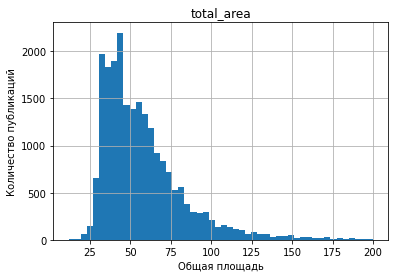

In [123]:
data.hist('total_area', bins = 50)
plt.xlabel("Общая площадь")
plt.ylabel("Количество публикаций")
plt.show()

Видно резкий подъём на где-то 25 квадратных метрах до пика общей площади от 25 до где-то 60 квадратных метров, который затем плавно падает в ноль к двумстам метрам, что говорит о том, что самые распространенные объявления касались средних по размеру квартир, скорее всего не больше двух комнат.

##### Жилая площадь

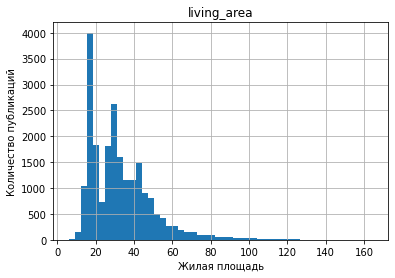

In [124]:
data.hist('living_area', bins = 50)
plt.xlabel("Жилая площадь")
plt.ylabel("Количество публикаций")
plt.show()

Видно три снижающихся пика с провалами между ними: пики около 18-20, 30 и 42 квадратных метров, а провалы где-то на 22 (сильный) и между 30 и 40 метрами (не очень сильный), затем плавное снижение в ноль к 160 квадратным метрам

##### Площадь кухни

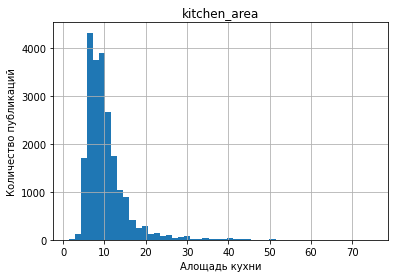

In [125]:
data.hist('kitchen_area', bins = 50)
plt.xlabel("Алощадь кухни")
plt.ylabel("Количество публикаций")
plt.show()

Видно, что распределение по виду напоминает распределение для общей площади, максимум где-то на 5-15 квадратных метрах с дальнейшим довольно резким снижением в ноль к 70 метрам, что подходит под размеры квартир, которые самые распространенные на продаже (то есть, данные общей площади, жилой площади и площади кухни дополняют друг друга)

##### Цена объекта

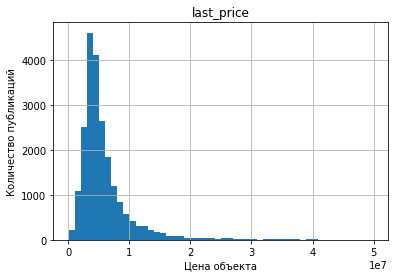

In [126]:
data.hist('last_price', bins = 50)
plt.xlabel("Цена объекта")
plt.ylabel("Количество публикаций")
plt.show()

Видно, что распределение стоимости объекта очень похоже на распределение общей площади объекта, что может сигнализировать о связи этих величин через такой параметр как `цена квадратного метра`, при этом выборка крупная, поэтому даже сильные различия в цене квадратного сглаживаются.
А так пик стоимости приходится на цену до 10 млн рублей, с максимумов в точке около 4-6 млн, с дальнейшим постепенным снижением в ноль к 40-50 млн рублей. И это тоже говорит в пользу связи с самыми популярными предложениями на рынке

##### Количество комнат

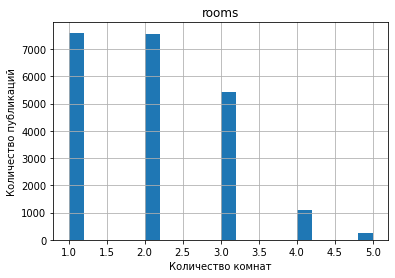

In [127]:
data.hist('rooms', bins = 20)
plt.xlabel("Количество комнат")
plt.ylabel("Количество публикаций")
plt.show()

Видно, что количество квартир с одной комнатой и двумя примерно одинаковое и максимальное, далее чуть меньше (процентов на 25) квартир с 3 комнатами, а квартир с 4 и 5 комнатами совсем мало (раз в 8 и в 30 меньше соответственно, чем 1- или 2-хкомнатных), что в очередной раз подтверждает данные по площадям помещений.

##### Высота потолков

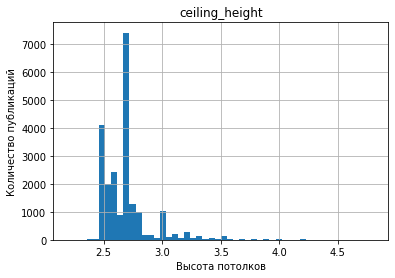

In [128]:
data.query('ceiling_height > -1').hist('ceiling_height', bins = 50)
plt.xlabel("Высота потолков")
plt.ylabel("Количество публикаций")
plt.show()

Распределение выглядит довольно рвано, выделяются несколько максимумов - 2.5, 2.6 и 3 м, после трех метров значений практически нет, между 2.5 и 2.6 метрами есть некоторые данные, между 2.6 и 3 метрами также практически нет данных, что говорит в пользу **высокой стандартизации этого параметра**.

##### Этаж квартиры

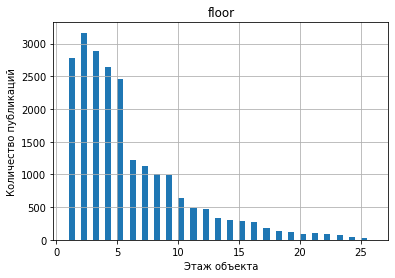

In [129]:
data.hist('floor', bins = 50)
plt.xlabel("Этаж объекта")
plt.ylabel("Количество публикаций")
plt.show()

Видно, что на первых пяти этажах находится примерно одинаковое количество помещений, с небольшим пиком на втором этаже, с шестого по 9й этажи раза в 2,5-3 меньше, чем на этажах 1-5, далее этажи 10-12 примерно одинаково и раза в два меньше, чем на 6-9 этажах, потом еще где-то на 25 процентов меньше на этажах 13-16, а далее уже практически по нисхожящей до 25 этажа.
Возможно, данные отражают количество этажей в зданиях, т.е. больше всего пятиэтажек, затем идут девятиэтажки, двенадцатиэтажки, шестнадцатиэтажки и т.д.

##### Тип этажа квартиры

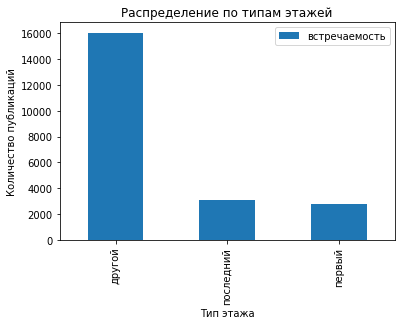

In [130]:
floor_type_counts = data['floor_type'].value_counts() #сначала рассчитаем, сколько у нас каждого из типов этажей
floor_types = pd.DataFrame({'тип_этажа': [floor_type_counts.index[0], floor_type_counts.index[1], floor_type_counts.index[2]],
               'встречаемость': [floor_type_counts[0], floor_type_counts[1], floor_type_counts[2]]})# сформируем датафрейм, который сгруппирует данные по типу этажа и его встречаемости
floor_types.plot(x = 'тип_этажа', y = 'встречаемость', kind = 'bar', title = 'Распределение по типам этажей')#рисуем столбчатую гистограмму 
plt.xlabel("Тип этажа")
plt.ylabel("Количество публикаций")
plt.show()

Видно, что на первом и последнем этажах расположено примерно одинаковое количество помещений, при этом их раз в 5-6 меньше, чем на других этажах (других этажей банально больше)

##### Общее количество этажей в доме

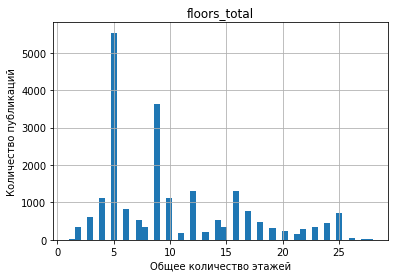

In [131]:
data.query('floors_total > -1').hist('floors_total', bins = 50)
plt.xlabel("Общее количество этажей")
plt.ylabel("Количество публикаций")
plt.show()

Видно характерные пики на 5, 9, 12, 16  и 25 этажах - между ними очень мало значений, что, скорее всего, говорит о типовых постройках - пятиэтажки, девятиэтажки, двенадцатиэтажки и т.д. Зданий с другим количеством этажей меньше, поэтому их в распределении мало

##### Расстрояние от центра города в метрах

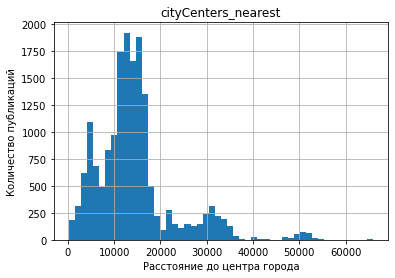

In [132]:
data.query('cityCenters_nearest > -1').hist('cityCenters_nearest', bins = 50)
plt.xlabel("Расстояние до центра города")
plt.ylabel("Количество публикаций")
plt.show()

Видно, что данные разбросаны неоднородно, однако, можно выделить, что большинство из имеющихся данных расположено в пределах 20 км от центра ближайшего города, с двумя пиками на 4-6 и 10-18 км, что, возможно, говорит, что есть несколько крупных населенных пунктов-городов с большим количеством публикаций квартир, и их поперечные размеры не превышают 8-12 и 20-36 км (если, к примеру, взглянуть на поперечные размеры Санкт-Петербурга, то получаем как раз около 30-40 км +, конечно, не забываю, что у нас есть данные и на расстояние до центра под 30 км, что ещё больше вписывается в размеры Петербурга). Ниже привел количество предложений по населенным пунктам и на них видно, что Петербург является безоговорочным лидером по количеству предложений, и, собственно, размерам, что подтверждается данными гистограммы.

In [133]:
data['locality_name'].value_counts().head()

Санкт-Петербург    14839
посёлок Мурино       441
Всеволожск           376
посёлок Шушары       365
деревня Кудрово      357
Name: locality_name, dtype: int64

##### Расстояние до ближайшего аэропорта

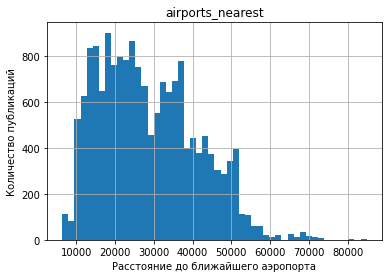

In [134]:
data.query('airports_nearest > -1').hist('airports_nearest', bins = 50)
plt.xlabel("Расстояние до ближайшего аэропорта")
plt.ylabel("Количество публикаций")
plt.show()

Видно, что абсолютное большинство помещений находятся в 10-50 км от аэропорта, пик данных характерен где-то для 15-25 км, что, скорее всего, снова благодаря Петербургу, так как и предложений оттуда больше всех, и от противоположного аэропорту края города до аэропорта как раз 15-25 км

##### Расстояние до ближайшего парка

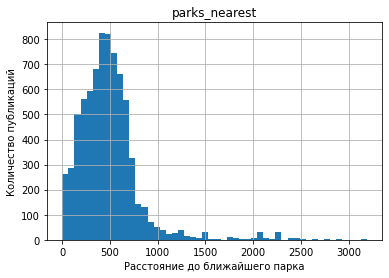

In [135]:
data.query('parks_nearest > -1').hist('parks_nearest', bins = 50)
plt.xlabel("Расстояние до ближайшего парка")
plt.ylabel("Количество публикаций")
plt.show()

Видно, что большинство помещений располагается в пределах 0,8 - 1 км от парка, после чего, резкое падение в ноль. Возможно, снова благодаря Петербургу, так как большинство предложений оттуда, а они на определенном расстоянии от его центра, но и парков в Питере много не в центре города, а на окраинах

##### День и месяц публикации объявления

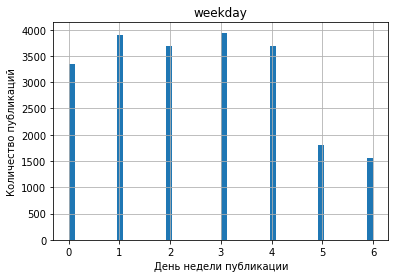

In [136]:
data.hist('weekday', bins = 50)
plt.xlabel("День недели публикации")
plt.ylabel("Количество публикаций")
plt.show()

Видно, что большинство публикаций приходится на будние дни с падением в примерно два раза в выходные, минимум среди будних дней - понедельник, максимум - вторник и четверг, среда и пятница примерно одинаково чуть ниже максимума. Среди всех дней минимум - воскресенье.

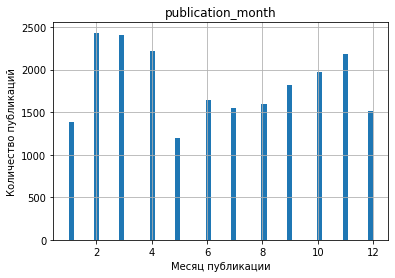

In [137]:
data.hist('publication_month', bins = 60)
plt.xlabel("Месяц публикации")
plt.ylabel("Количество публикаций")
plt.show()

Видно, что активность выпуска объявлений неоднородная в течение года. Максимум приходится на февраль и март, минимум - май и январь. В летние месяцы активность примерно одинаковая с линейным повышением в течение осени и дальнейшим падением в декабре.

##### Промежуточный итог 7

<div style="border:solid blue 5px; padding: 20px">

Рассмотрел закономерности в следующих параметрах:
- **общая площадь**;
        Видно резкий подъём на где-то 25 квадратных метрах до пика общей площади от 25 до где-то 60 квадратных метров, который затем плавно падает в ноль к двумстам метрам, что говорит о том, что самые распространенные объявления касались средних по размеру квартир, скорее всего не больше двух комнат.
    
- **жилая площадь**;
        Видно три снижающихся пика с провалами между ними: пики около 18-20, 30 и 42 квадратных метров, а провалы где-то на 22 (сильный) и между 30 и 40 метрами (не очень сильный), затем плавное снижение в ноль к 160 квадратным метрам
- **площадь кухни**;
        Видно, что распределение по виду напоминает распределение для общей площади, максимум где-то на 5-15 квадратных метрах с дальнейшим довольно резким снижением в ноль к 70 метрам, что подходит под размеры квартир, которые самые распространенные на продаже (то есть, данные общей площади, жилой площади и площади кухни дополняют друг друга)
- **цена объекта**;
        Видно, что распределение стоимости объекта очень похоже на распределение общей площади объекта, что может сигнализировать о связи этих величин через такой параметр как `цена квадратного метра`, при этом выборка у нас крупная, поэтому даже сильные различия в цене квадратного сглаживаются.
        А так пик стоимости приходится на цену до 10 млн рублей, с максимумов в точке около 4-6 млн, с дальнейшим постепенным снижением в ноль к 40-50 млн рублей. И это тоже говорит в пользу связи с самыми популярными предложениями на рынке
- **количество комнат**;
        Видно, что количество квартир с одной комнатой и двумя примерно одинаковое и максимальное, далее чуть меньше (процентов на 25) квартир с 3 комнатами, а квартир с 4 и 5 комнатами совсем мало (раз в 8 и в 30 меньше соответственно, чем 1- или 2-хкомнатных), что в очередной раз подтверждает данные по площадям помещений.
- **высота потолков**;
        Распределение выглядит довольно рвано, выделяются несколько максимумов - 2.5, 2.6 и 3 м, после трех метров значений практически нет, между 2.5 и 2.6 метрами есть некоторые данные, между 2.6 и 3 метрами также практически нет данных, что говорит в пользу высокой стандартизации этого параметра.
- **этаж квартиры**;
        Видно, что на первых пяти этажах находится примерно одинаковое количество помещений, с небольшим пиком на втором этаже, с шестого по 9й этажи раза в 2,5-3 меньше, чем на этажах 1-5, далее этажи 10-12 примерно одинаково и раза в два меньше, чем на 6-9 этажах, потом еще где-то на 25 процентов меньше на этажах 13-16, а далее уже практически по нисхожящей до 25 этажа. Возможно, данные отражают количество этажей в зданиях, т.е. больше всего пятиэтажек, затем идут девятиэтажки, двенадцатиэтажки, шестнадцатиэтажки и т.д.
- **тип этажа квартиры («первый», «последний», «другой»)**;
        Видно, что на первом и последнем этажах расположено примерно одинаковое количество помещений, при этом их раз в 5-6 меньше, чем на других этажах (других этажей банально больше)
- **общее количество этажей в доме**;
        Видно характерные пики на 5, 9, 12, 16 и 25 этажах - между ними очень мало значений, что, скорее всего, говорит о типовых постройках - пятиэтажки, девятиэтажки, двенадцатиэтажки и т.д. Зданий с другим количеством этажей меньше, поэтому их в распределении мало
- **расстояние до центра города в метрах**;
        Видно, что данные разбросаны неоднородно, однако, можно выделить, что большинство из имеющихся данных расположено в пределах 20 км от центра ближайшего города, с двумя пиками на 4-6 и 10-18 км, что, возможно, говорит, что есть несколько крупных населенных пунктов-городов с большим количеством публикаций квартир, и их поперечные размеры не превышают 8-12 и 20-36 км (если, к примеру, взглянуть на поперечные размеры Санкт-Петербурга, то получаем как раз около 30-40 км +, конечно, не забываю, что есть данные и на расстояние до центра под 30 км, что ещё больше вписывается в размеры Петербурга). В данном пункте также привел количество предложений по населенным пунктам и на них видно, что Петербург является безоговорочным лидером по количеству предложений, и, собственно, размерам, что подтверждается данными гистограммы.
- **расстояние до ближайшего аэропорта**;
        Видно, что абсолютное большинство помещений находятся в 10-50 км от аэропорта, пик данных характерен где-то для 15-25 км, что, скорее всего, снова благодаря Петербургу, так как и предложений оттуда больше всех, и от противоположного аэропорту края города до аэропорта как раз 15-25 км
- **расстояние до ближайшего парка**;
        Видим, что большинство помещений располагается в пределах 0,8 - 1 км от парка, после чего, резкое падение в ноль. Возможно, снова благодаря Петербургу, так как большинство предложений оттуда, а они на определенном расстоянии от его центра, но и парков в Питере много не в центре города, а на окраинах
- **день и месяц публикации объявления**.
        Видно, что большинство публикаций приходится на будние дни с падением в примерно два раза в выходные, минимум среди будних дней - понедельник, максимум - вторник и четверг, среда и пятница примерно одинаково чуть ниже максимума. Среди всех дней минимум - воскресенье. Если взглянуть на месяцы, то видим, что активность выпуска объявлений неоднородная в течение года. Максимум приходится на февраль и март, минимум - май и январь. В летние месяцы активность примерно одинаковая с линейным повышением в течение осени и дальнейшим падением в декабре.
</div>

#### Как быстро продавались квартиры?

Построю гистограмму, на которой выведу распределение дней с момента публикации до продажи

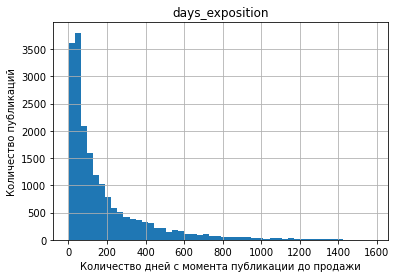

In [138]:
data.hist('days_exposition', bins = 50)
plt.xlabel("Количество дней с момента публикации до продажи")
plt.ylabel("Количество публикаций")
plt.show()

Посчитаю статистику

In [139]:
data['days_exposition'].describe()

count    19011.000000
mean       180.789385
std        219.700303
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Далее выведу шапку подсчета количества объявлений по каждой скорости продаж, чтобы выяснить максимум

In [140]:
data['days_exposition'].value_counts().head()

45.0    804
60.0    498
7.0     208
30.0    191
90.0    176
Name: days_exposition, dtype: int64

Продажа квартиры в среднем занимает полгода (180 дней), характерно что-то вроде распределения Пуассона, максимум плотности продаж приходится на сроки от 45 до 231 дней, самая долгая продажа длилась 1580 дней (около 4х лет), в целом, дума, долгими можно назвать продажи, которые выходят за третий квартиль (дольше 230 дней), а быстрыми, которые меньше первого квартиля (меньше 45 дней). Пик продаж приходится на 45 дней с момента публикации, далее идут 60 и 7 дней.

Пики 45 и 60 дней, вероятно, могут быть связаны с какими-либо особенностями оформления продажи, может, что-то с риелторскими делами, которые могут занимать определённое количество дней. Также это могут быть особенности работы сайта(-ов) по продаже недвижимости - например, ограниченное время публикации - 45 и 60 дней, а время публикации может быть связано со статусом пользователя: обычный или премиум.

##### Промежуточный итог 8

<div style="border:solid blue 5px; padding: 20px">

Продажа квартиры в среднем занимает полгода (180 дней), характерно что-то вроде распределения Пуассона, максимум плотности продаж приходится на сроки от 45 до 231 дней, самая долгая продажа длилась 1580 дней (около 4х лет), в целом, дума, долгими можно назвать продажи, которые выходят за третий квартиль (дольше 230 дней), а быстрыми, которые меньше первого квартиля (меньше 45 дней). Пик продаж приходится на 45 дней с момента публикации, далее идут 60 и 7 дней.

Пики 45 и 60 дней, вероятно, могут быть связаны с какими-либо особенностями оформления продажи, может, что-то с риелторскими делами, которые могут занимать определённое количество дней. Также это могут быть особенности работы сайта(-ов) по продаже недвижимости - например, ограниченное время публикации - 45 и 60 дней, а время публикации может быть связано со статусом пользователя: обычный или премиум.
</div>

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучу, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

##### Зависимость цены от общей площади

Рассмотрю, как цена зависит от общей площади. Для начала сгруппирую данные в сводную таблицу и попробую построить график:

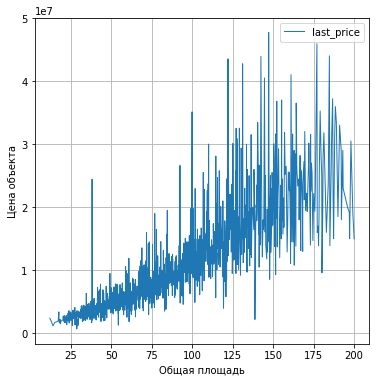

In [141]:
(data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median')\
.plot(linewidth=1, figsize=(6, 6), grid=True))
plt.xlabel("Общая площадь")
plt.ylabel("Цена объекта")
plt.show()

Получилось не очень информативно, хотя уже видна некоторая закономерность - чем больше площадь, тем выше цена и выше разброс этой цены. Попробую поменять тип графика

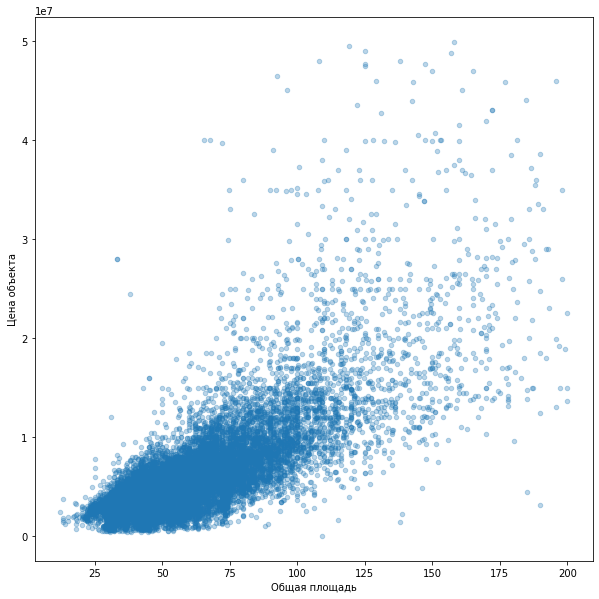

In [142]:
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(10, 10), alpha = 0.3)
plt.xlabel("Общая площадь")
plt.ylabel("Цена объекта")
plt.show()

Видно, что плотность цен на квартиры максимальная для площадей от 25 до 100 квадратов. Может быть связано:
- чисто с количеством этих предложений
- с меньшей вариабельностью цен

Построю немного другой тип графика

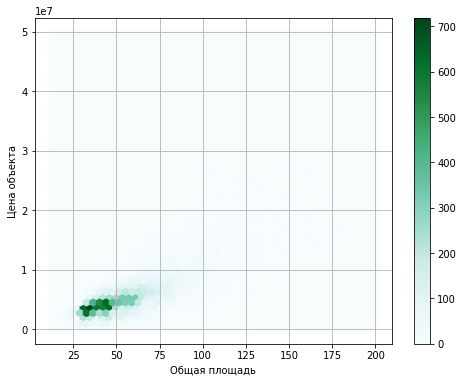

In [143]:
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=50, figsize=(8, 6), sharex=False, grid=True)
plt.xlabel("Общая площадь")
plt.ylabel("Цена объекта")
plt.show()

Видно, что в целом плотность распределена на площадях от 25 до 75 квадратов и стоимости до 10 млн руб. Попробую выделить эти значения и рассмотреть поближе.

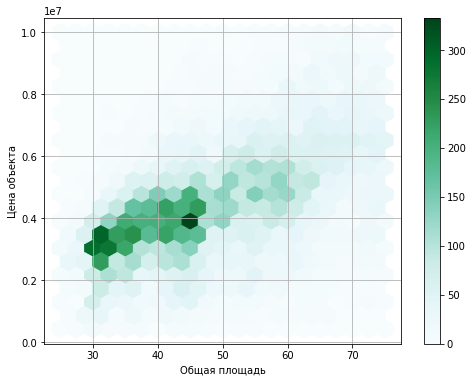

In [144]:
(data.query('(total_area >= 25) & (total_area <= 75) & (last_price <= 1e7)').\
plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True))
plt.xlabel("Общая площадь")
plt.ylabel("Цена объекта")
plt.show()

Видно, что самая большая плотность у нас в области квартир 30 квадратов, стоимостью около 3 млн руб, при этом видимые очаги плотности в диапазоне от 30 до 50 квадратов (видимо, самые популярные варианты), стоимостью от 2 до 5 млн руб. То есть, лучше всего продавались квартиры либо маленькие, либо средние по общей площади. В целом, заметен очень большой разброс цен на большие площади квартир, и более скученные значения на меньших площадях

##### Зависимость цены от жилой площади

Построю диаграмму плотности рассеяния для цены квартиры от жилой площади (исключаем пустые значения жилой площади, обозначенные `-1`)

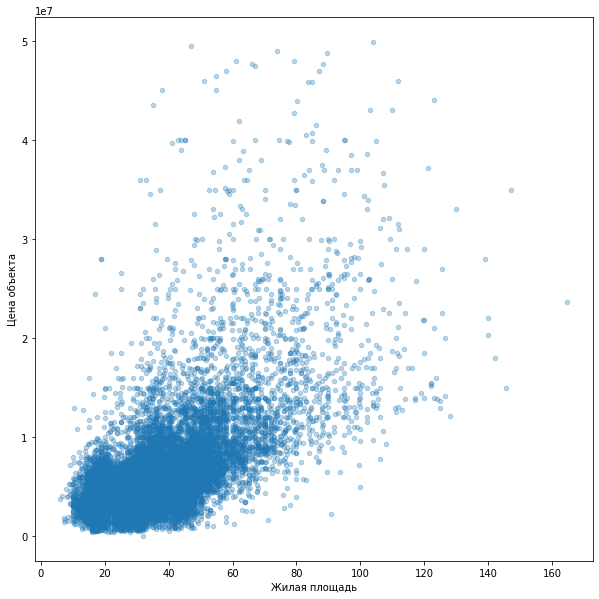

In [145]:
data.plot(x='living_area', y='last_price', kind='scatter', figsize=(10, 10), alpha = 0.3)
plt.xlabel("Жилая площадь")
plt.ylabel("Цена объекта")
plt.show()

Видно, что максимум плотности продаж приходится на 10-70 квадратных метров жилой лощади за 0-15 млк рублей, рассмотрю поближе:

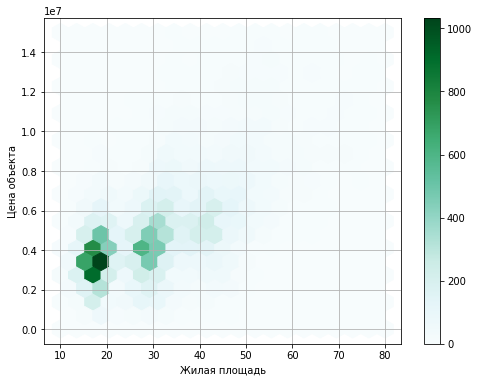

In [146]:
(data.query('(living_area >= 10) & (living_area <= 80) & (last_price <= 1.5e7)').\
plot(x='living_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True))
plt.xlabel("Жилая площадь")
plt.ylabel("Цена объекта")
plt.show()

Видим два небольших пятна, с максимумом плотности в одном из них, приходящееся на жилую плозадь от 15 до 20 квадратов стоимостью от двух до 5 млн, и второе пятно, где-то 25-30 квадратов стоимостью от 4 до 6 млн (это сильно похоже на то, что самые популярные варианты - небольшие квартиры - однушки и двушки, а их стоимость похожа на распределние стоимости квартир по общей площади помещения. Аналогично общей площади - большой разброс цен на большие жилые площади и более скученные для меньших площадей

##### Зависимость цены от площади кухни

Построю диаграмму плотности рассеяния для цены квартиры от площади кухни

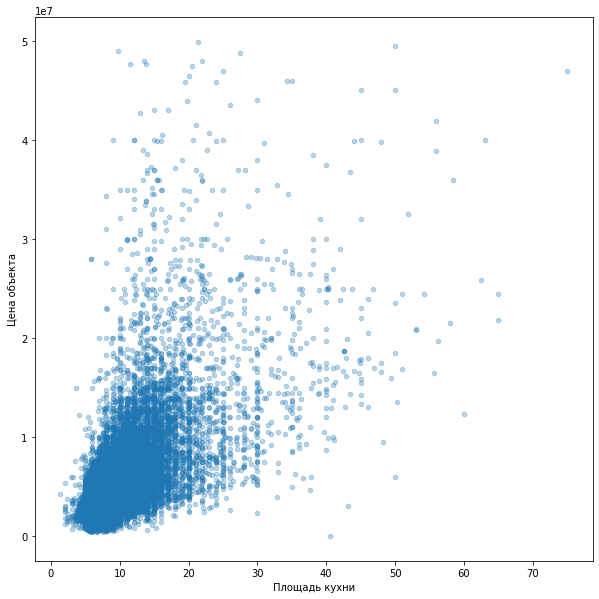

In [147]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(10, 10), alpha = 0.3)
plt.xlabel("Площадь кухни")
plt.ylabel("Цена объекта")
plt.show()

Видно наибольшую площадь для площади кухни от 5 до 25 квадратов и стоимости от 0 до 20 мл руб, за пределами этого "пятна" данные сильно разбросаны и размыты, попробую выделить его, чтобы рассмотреть поподробнее:

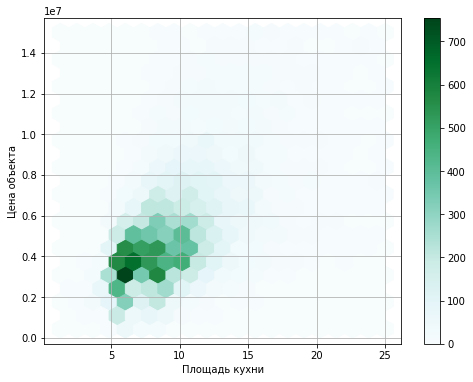

In [148]:
(data.query('(kitchen_area <= 25) & (last_price <= 1.5e7)').\
plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True))
plt.xlabel("Площадь кухни")
plt.ylabel("Цена объекта")
plt.show()

Видно, что самые распространенные варианты - кухня около 5-10 квадратов в квартире за 3-5 млн рублей, что в принципе немного похоже на данные по общей площади квартир в ценовом диапазоне, при этом такие размеры кухни неплохо вписываются в площади квартир за эту цену (если посмотреть на вывод по зависисмости цены от общей площади). Опять же все вышеперечисленные зависимости от площади говорят о том, что самые популярные варианты на продажу - небольшие квартиры, при этом стоимость эттих квартир, скорее всего, не очень сильно варьирует, вследствие высокой конкуренции на рынке (таких предложений банально много).

##### Зависимость цены от количества комнат
Сгруппирую стоимости квартир по количеству комнат в них и посмотрим на количество, среднее и медианное значение:

In [149]:
rooms_pivot = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count','mean','median'])
rooms_pivot

,count,mean,median
,last_price,last_price,last_price
rooms,,,
1,7603,3.846493e+06,3600000.0
2,7557,5.524447e+06,4750000.0
3,5421,7.674973e+06,6150000.0
4,1077,1.093084e+07,8750000.0
5,252,1.402070e+07,12500000.0


Построю столбчатую гистограмму для количества квартир с каждым количеством комнат

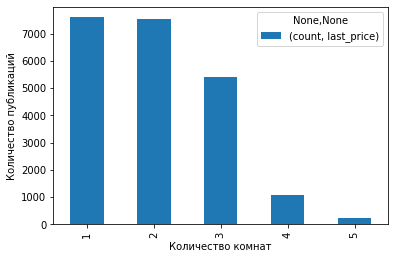

In [150]:
rooms_pivot.plot(y = ['count'], kind = 'bar')
plt.xlabel("Количество комнат")
plt.ylabel("Количество публикаций")
plt.show()

Построю столбчатую гистограмму для стоимостей квартир с каждым количеством комнат

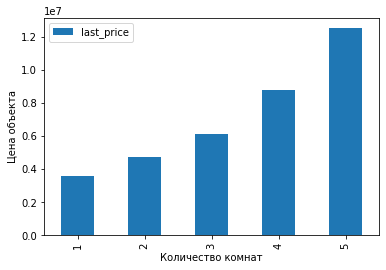

In [151]:
rooms_pivot.plot(y = 'median', kind = 'bar')
plt.xlabel("Количество комнат")
plt.ylabel("Цена объекта")
plt.show()

По таблице и графикам очень хорошо видно, что больше всего продавали однушки и двушки (что хорошо подходит под наши предыдущие вывод о площадях квартир), чуть хуже продаются трешки, и, совсем плохо 4х и пятикомнатные квартиры. 
При этом по стоимости, конечно, видно, что чем больше комнат, тем цена выше (и среднее, и медианное значение), при этом среднее значение во всех случаях выше медианного, видимо, в силу выбросов с высокой стоимостью.

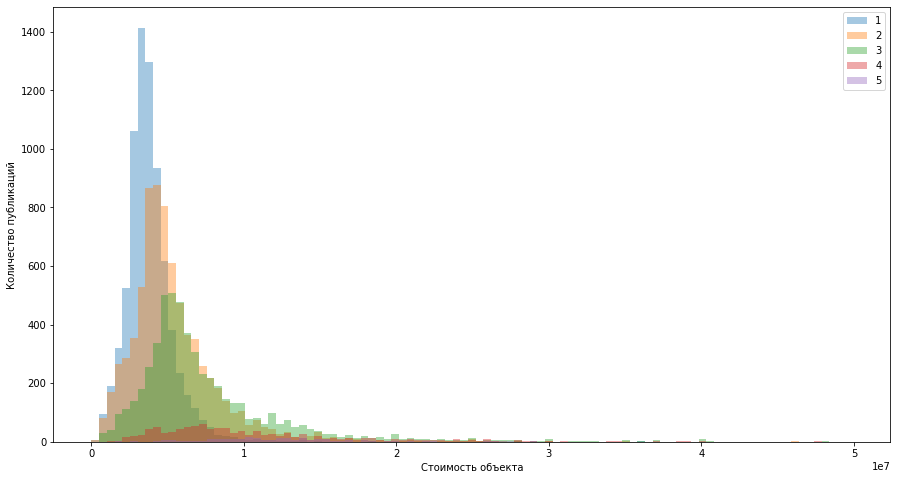

In [152]:
import numpy

bins = numpy.linspace(data['last_price'].min(), data['last_price'].max(), 100)

for rooms in range(len(data['rooms'].unique())):
    rooms += 1
    x = data.query('rooms == @rooms')['last_price']
    plt.hist(x, bins, alpha=0.4, label= rooms)
    plt.legend(loc='upper right')

plt.gcf().set_size_inches(15, 8)
plt.xlabel("Стоимость объекта")
plt.ylabel("Количество публикаций")
plt.show() 

На общей гистограмме также четко видно, что стоимость растет с увеличением количества комнат, а также, что самые популярные варианты - 1-3 комнаты

##### Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)
СгруппируЮ медианную цену квартир по типу этажа и построим столбчатую гистограмму:

<AxesSubplot:xlabel='floor_type'>

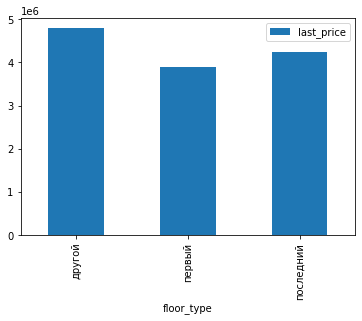

In [153]:
data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc ='median').plot(y = 'last_price', kind = 'bar')

Видно, что если смотреть медианные значения для типов этажей, получается не очень наглядно, так как они все практически одинаковые (хотя это может наталкивать на мысль, что стоимость практически не зависит от типа этажа, хотя первый и последний этажи стоят немного дешевле, чем другой, при этом минимум стоимости находится на первом этаже, что в принципе может быть связано с особенностями жизни на нём).
ПопробуЮ построить гистограммы стоимостей квартир для каждого типа этажа отдельно

Распределение цен на квартиры на этаже типа: другой


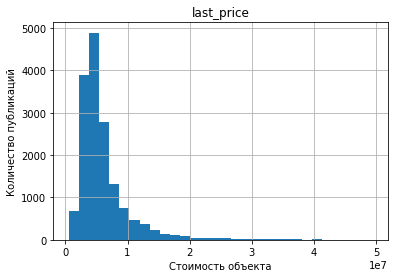

Распределение цен на квартиры на этаже типа: первый


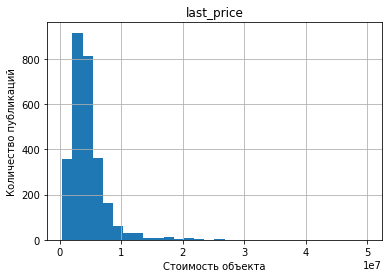

Распределение цен на квартиры на этаже типа: последний


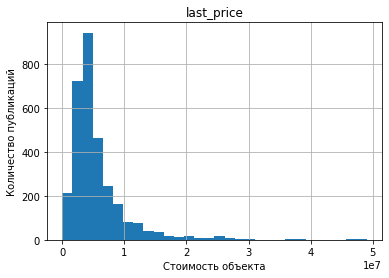

In [154]:
for types in data['floor_type'].unique():    
    print('Распределение цен на квартиры на этаже типа:', types)
    data.query('floor_type == @types').hist('last_price', bins = 30)
    plt.xlabel("Стоимость объекта")
    plt.ylabel("Количество публикаций")
    plt.show()

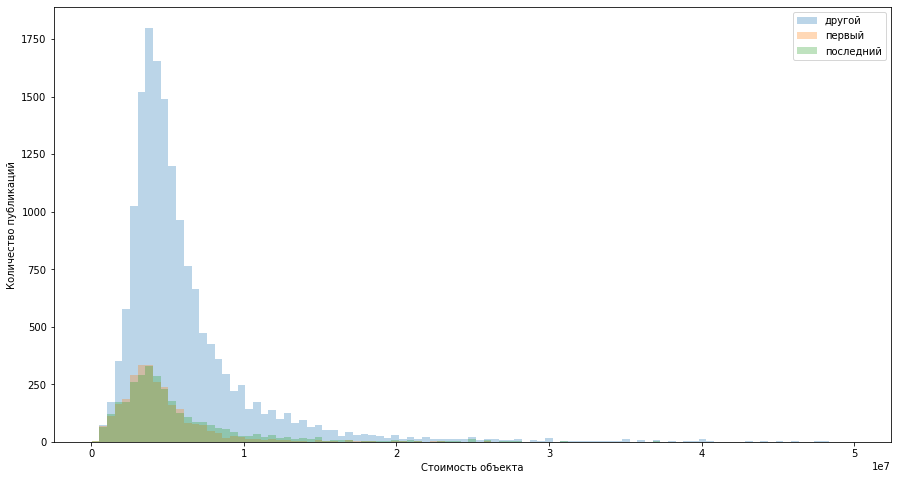

In [155]:
bins = numpy.linspace(data['last_price'].min(), data['last_price'].max(), 100)

floor_types = data['floor_type'].unique()
        
for types in floor_types:
    x = data.query('floor_type == @types')['last_price']
    plt.hist(x, bins, alpha=0.3, label= types)
    plt.legend(loc='upper right')

plt.gcf().set_size_inches(15, 8)
plt.xlabel("Стоимость объекта")
plt.ylabel("Количество публикаций")
plt.show() 

На гистограммах видно, что распределение цен очень похожего вида для каждого типа этажей, что, в принципе, подтверждает предыдущие выводы. При этом на гистограмме общего вида видно, что продажи квартир на других этажах раз в 6-7 выше, чем на первом или последнем этаже, а между собой первый и последний этажи очень похожи. При этом разброс цен на квартиры первого и последнего этажей примерно одинаковое, а вто время как на других этажах он гораздо больше.

##### Зависимость цены от дня недели, месяца или года публикации


###### День недели

Посмотрю на распределение медианы стоимости квартиры от дня недели:

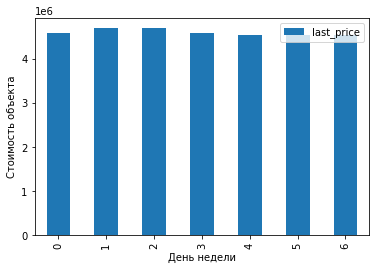

In [156]:
data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median').plot(y = 'last_price', kind = 'bar')
plt.xlabel("День недели")
plt.ylabel("Стоимость объекта")
plt.show()

Видно, что стоимость практически не меняется в зависимости от дня недели публикации, что выглядит логично. Попробую посмотреть на распределение цен по каждому дню:

Распределение цен на квартиры в Понедельник


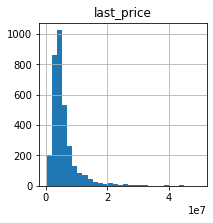

Распределение цен на квартиры во Вторник


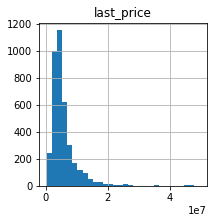

Распределение цен на квартиры в Среду


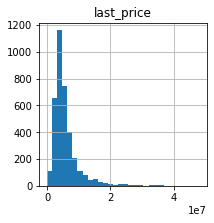

Распределение цен на квартиры в Четверг


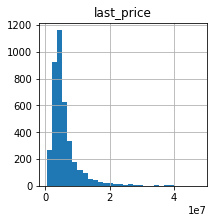

Распределение цен на квартиры в Пятницу


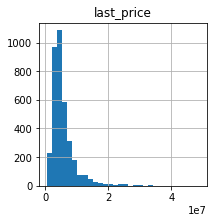

Распределение цен на квартиры в Субботу


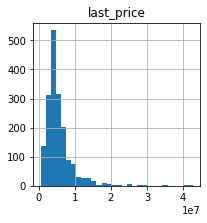

Распределение цен на квартиры в Воскресенье


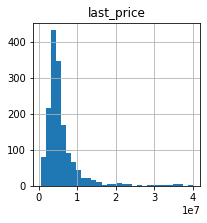

In [157]:
days_of_week = ['Понедельник', 'Вторник', 'Среду', 'Четверг', 'Пятницу', 'Субботу', 'Воскресенье']
        
for i in range(len(days_of_week)):
    if i != 1:
        print('Распределение цен на квартиры в', days_of_week[i])
        data.query('weekday == @i').hist('last_price', figsize = (3,3), bins = 30)
        plt.show()
    else:
        print('Распределение цен на квартиры во', days_of_week[i])
        data.query('weekday == @i').hist('last_price', figsize = (3,3), bins = 30)
        plt.show()

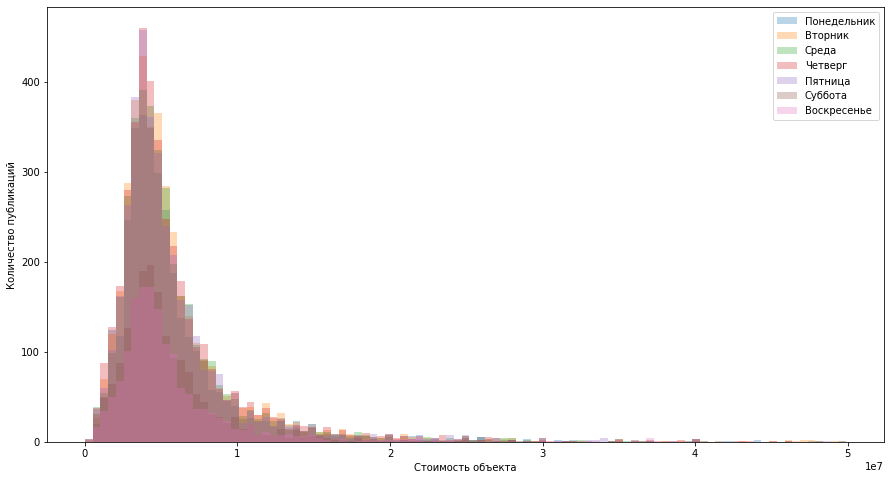

In [158]:
bins = numpy.linspace(data['last_price'].min(), data['last_price'].max(), 100)

days_of_week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
        
for i in range(len(days_of_week)):
    x = data.query('weekday == @i')['last_price']
    plt.hist(x, bins, alpha=0.3, label= days_of_week[i])
    plt.legend(loc='upper right')

plt.gcf().set_size_inches(15, 8)
plt.xlabel("Стоимость объекта")
plt.ylabel("Количество публикаций")
plt.show() 

На гистограммах видно, что стоимость не сильно варьирует в зависимости от дня недели, что подтверждает предыдущий вывод по медианной стоимости квартир

###### Месяц

Посмотрю сводную таблице медианной стоимости квартир в каждый месяц

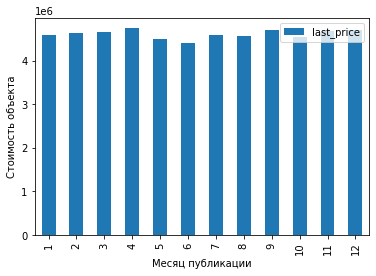

In [159]:
data.pivot_table(index = 'publication_month', values = 'last_price', aggfunc = 'median').plot(y = 'last_price', kind = 'bar')
plt.xlabel("Месяц публикации")
plt.ylabel("Стоимость объекта")
plt.show() 

Видно, что по сути нет зависимости от месяца, построим гистограммы, чтобы сравнить глазами сами распределения

Распределение цен на квартиры в январе


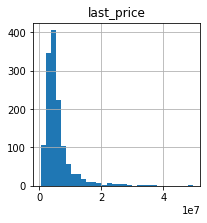

Распределение цен на квартиры в феврале


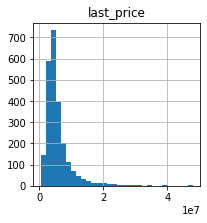

Распределение цен на квартиры в марте


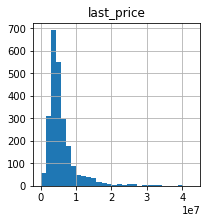

Распределение цен на квартиры в апреле


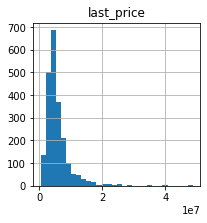

Распределение цен на квартиры в мае


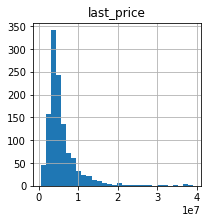

Распределение цен на квартиры в июне


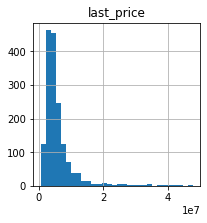

Распределение цен на квартиры в июле


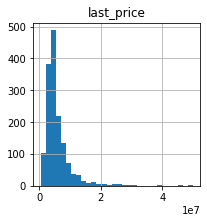

Распределение цен на квартиры в августе


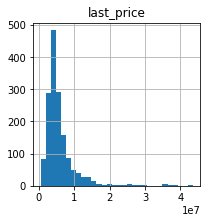

Распределение цен на квартиры в сентябре


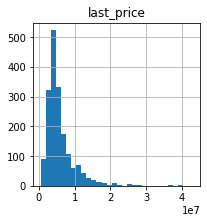

Распределение цен на квартиры в октябре


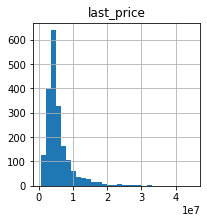

Распределение цен на квартиры в ноябре


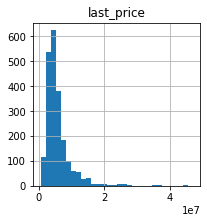

Распределение цен на квартиры в декабре


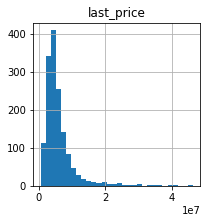

In [160]:
months = ['январе', 'феврале', 'марте', 'апреле', 'мае', 'июне', 'июле','августе','сентябре','октябре','ноябре','декабре']
        
for month in range(len(months)):
        print('Распределение цен на квартиры в', months[month])
        month += 1
        data.query('publication_month == @month').hist('last_price', figsize = (3,3), bins = 30)
        plt.show()

Видно, что распределение стоимости практически не меняется в зависимости от месяца.

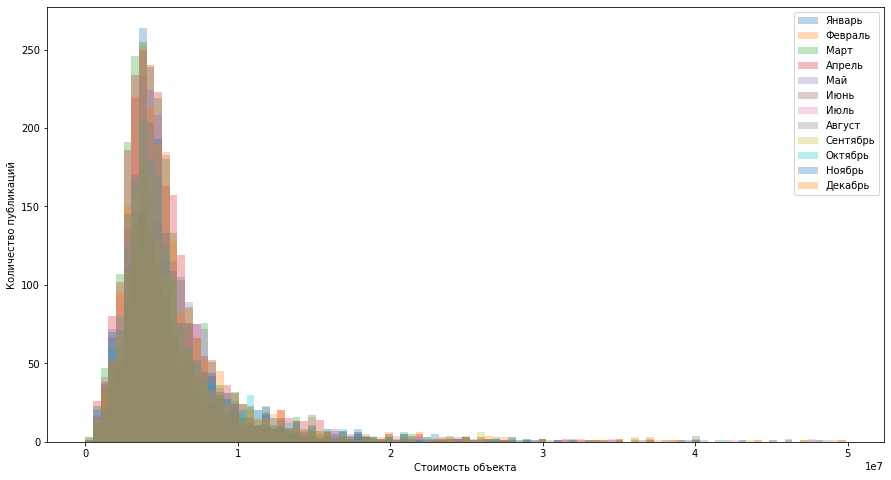

In [161]:
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']
for i in range(len(data['publication_month'].unique())):
    x = data.query('publication_month == @i')['last_price']
    plt.hist(x, bins, alpha=0.3, label= months[i])
    plt.legend(loc='upper right')

plt.gcf().set_size_inches(15, 8)
plt.xlabel("Стоимость объекта")
plt.ylabel("Количество публикаций")
plt.show() 

Видно, что распределение стоимостейквартир по месяцам примерно одинаковое и делаем вывод, что цена на квартиру не зависит от месяца, что тоже, в принципе, логично

###### Год

Для начала в отдельный столбец добавлю год публикации, сгруппирую стоимость квартир по годам, на гистограмме выведу медианное значение стоимости по годам

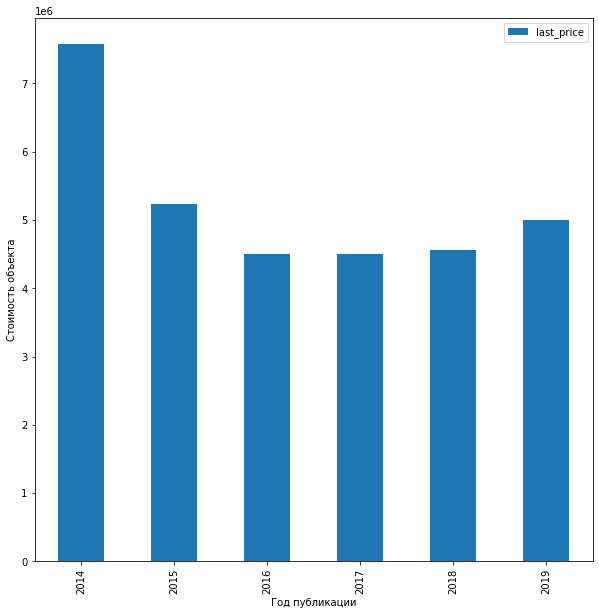

In [162]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median').plot(kind = 'bar', figsize = (10,10))
plt.xlabel("Год публикации")
plt.ylabel("Стоимость объекта")
plt.show() 

Видно, что медианная стоимость в 2014 году самая высокая, при этом остальные года показывают примерно одинаковые значения в пределах 40-50 млн рублей. Посмотрю, сколько вообще значений характерно для каждого из годов:

In [163]:
data['year'].value_counts()

2018    7871
2017    7513
2019    2687
2016    2614
2015    1098
2014     127
Name: year, dtype: int64

В принципе, становится немного понятнее - учитывая, что 2014 году всего 127 публикаций, неудивительно, что медианная стоимость квартир так сильно отличается, хотя в генезе такой стоимости может играть и какой-либо другой фактор. Попробую рассмотреть распределние стоимостей квартир для каждого года отдельно:

Распределение цен на квартиры в 2014 году


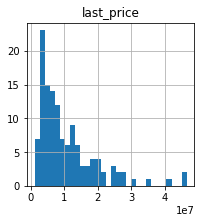

Распределение цен на квартиры в 2015 году


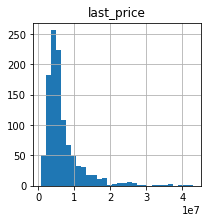

Распределение цен на квартиры в 2016 году


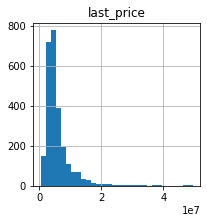

Распределение цен на квартиры в 2017 году


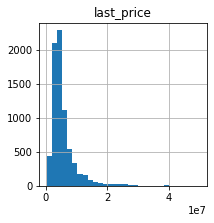

Распределение цен на квартиры в 2018 году


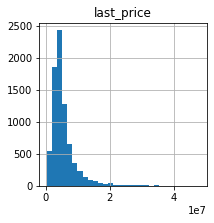

Распределение цен на квартиры в 2019 году


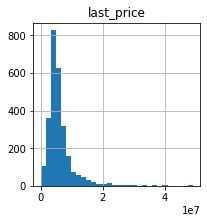

In [164]:
for years in sorted(data['year'].unique()):
        print('Распределение цен на квартиры в', years, 'году')
        data.query('year == @years').hist('last_price', figsize = (3,3), bins = 30)
        plt.show()

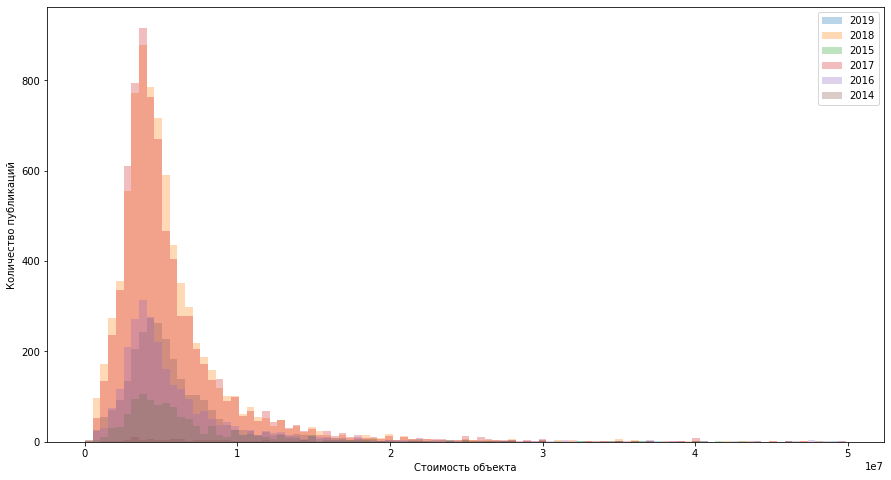

In [165]:
for i in data['year'].unique():
    x = data.query('year == @i')['last_price']
    plt.hist(x, bins, alpha=0.3, label= i)
    plt.legend(loc='upper right')

plt.gcf().set_size_inches(15, 8)
plt.xlabel("Стоимость объекта")
plt.ylabel("Количество публикаций")
plt.show() 

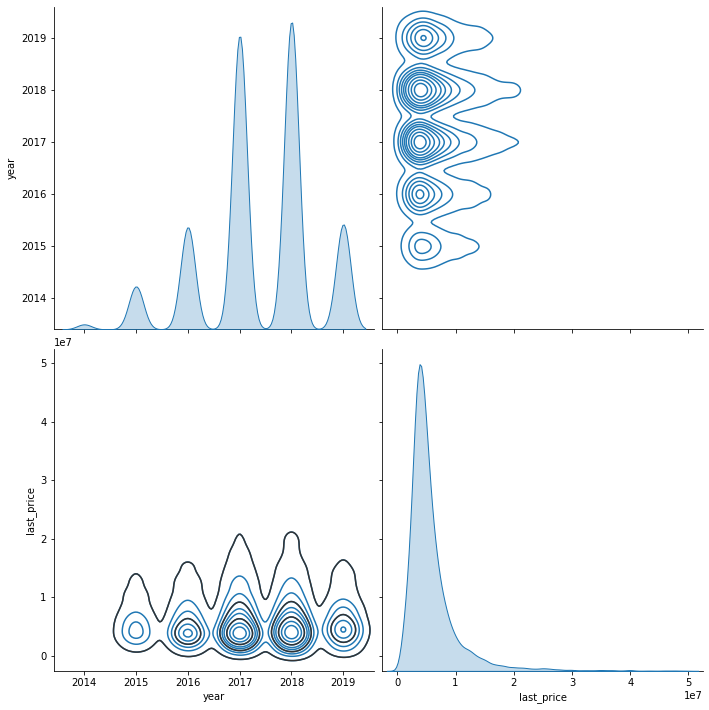

In [166]:
import seaborn

g = seaborn.pairplot(data[['year','last_price']], height= 5, kind = 'kde')
g.map_lower(seaborn.kdeplot, levels=4, color=".2")

Видно, что 2014 год отличается рваностью распределения цен, в то время как 2015-2019 года распределены примерно одинаково.самые большие продажи характерны для 2017-2018 годов, что видно и на отдельных гистограммах, и на общей.

##### Промежуточный итог 9

<div style="border:solid blue 5px; padding: 20px">

Рассмотрел зависимость общей стоимости объекта от:
- **общей площади**;
        Видно, что самая большая плотность у нас в области квартир 30 квадратов, стоимостью около 3 млн руб, при этом видимые очаги плотности в диапазоне от 30 до 50 квадратов (видимо, самые популярные варианты), стоимостью от 2 до 5 млн руб. То есть, лучше всего продавались квартиры либо маленькие, либо средние по общей площади. В целом, заметен очень большой разброс цен на большие площади квартир, и более скученные значения на меньших площадях
    
- **жилой площади**;
        Видно два небольших пятна, с максимумом плотности в одном из них, приходящееся на жилую плозадь от 15 до 20 квадратов стоимостью от двух до 5 млн, и второе пятно, где-то 25-30 квадратов стоимостью от 4 до 6 млн (это сильно похоже на то, что самые популярные варианты - небольшие квартиры - однушки и двушки, а их стоимость похожа на распределние стоимости квартир по общей площади помещения. Аналогично общей площади - большой разброс цен на большие жилые площади и более скученные для меньших площадей
    
- **площади кухни**;
        Видно, что самые распространенные варианты - кухня около 5-10 квадратов в квартире за 3-5 млн рублей, что в принципе немного похоже на данные по общей площади квартир в ценовом диапазоне, при этом такие размеры кухни неплохо вписываются в площади квартир за эту цену (если посмотреть на вывод по зависисмости цены от общей площади). 
    
    > Опять же все вышеперечисленные зависимости от площади говорят о том, что самые популярные варианты на продажу - небольшие квартиры, при этом стоимость эттих квартир, скорее всего, не очень сильно варьирует, вследствие высокой конкуренции на рынке (таких предложений банально много).
    
- **количества комнат**;
        По таблице и графикам очень хорошо видно, что больше всего продавали однушки и двушки (что хорошо подходит под наши предыдущие вывод о площадях квартир), чуть хуже продаются трешки, и, совсем плохо 4х и пятикомнатные квартиры. При этом по стоимости, конечно, видно, что чем больше комнат, тем цена выше (и среднее, и медианное значение), при этом среднее значение во всех случаях выше медианного, видимо, в силу выбросов с высокой стоимостью, которых много было видно на диаграммах по площадям квартир.
    
- **этажа, на котором расположена квартира**;
        Если смотреть медианные значения для типов этажей, получается не очень наглядно, так как они все практически одинаковые (хотя это может наталкивать на мысль, что стоимость практически не зависит от типа этажа, хотя первый и последний этажи стоят немного дешевле, чем другой, при этом минимум стоимости находится на первом этаже, что в принципе может быть связано с особенностями жизни на нём). На гистограммах стоимостей квартир для каждого типа этажа отдельно видно, что распределение цен очень похожего вида для каждого типа этажей, что, в принципе, подтверждает предыдущий вывод. При этом на гистограмме общего вида видно, что продажи квартир на других этажах раз в 6-7 выше, чем на первом или последнем этаже, а между собой первый и последний этажи очень похожи. При этом разброс цен на квартиры первого и последнего этажей примерно одинаковое, а вто время как на других этажах он гораздо больше.      
    
- **даты размещения**;
        Стоимость квартиры не зависит ни от дня недели публикации объявления, ни от месяца, есть небольшой выброс с годом публикации: только в одном году (2014 - самый первый в наших данных), медианная стоимость квартир отличается от остальных (самая высокая), остальные года цена изменялась очень слабо
    
    
**ОБЩИЙ ВЫВОД ПО ЭТОМУ ПУНКТУ**
        
    Больше всего на стоимость квартиры влияют её площади (общая, жилая, площадь кухни), а также количество комнат (все эти четыре параметра между собой очень тесно связаны, что лишь подтверждает этот вывод), ни этаж, ни дата публикации практически не влияют на стоимость, что логично (хрущевка в понедельник - та же хрущевка в воскресенье, цена от этого у неё краше не станет). Ожидалось, что будет какая-то зависимость от года публикации просто вследствие того, что цены на квартиры стабильно идут вверх, но этого практически не было видно по данным.
        
</div>

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

Посчитаю среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделю населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Для начала посмотрю на населённые пункты с наибольшим количеством объявлений и запишем их в переменную `locality_name_max` и выведу её на экран:

In [167]:
locality_name_max = data['locality_name'].value_counts().head(10)
locality_name_max

Санкт-Петербург    14839
посёлок Мурино       441
Всеволожск           376
посёлок Шушары       365
деревня Кудрово      357
Пушкин               354
Колпино              327
Гатчина              290
Выборг               234
Петергоф             196
Name: locality_name, dtype: int64

Далее сгруппирую данные в сводную таблицу, в которой сделаю срез по населённым пунктам из нашей переменной `locality_name_max`, индексом будет служить название населенного пункта, значение - цена квадратного метра, посчитаю для каждого населенного пункта из `locality_name_max` средннюю стоимость квадратного метра:

,Средняя_стоимость_квадратного_метра
locality_name,
Всеволожск,68598.866594
Выборг,58290.042257
Гатчина,68723.722281
Колпино,75236.582770
Петергоф,84343.978881
Пушкин,102869.663987
Санкт-Петербург,111824.823015
деревня Кудрово,95672.300602
посёлок Мурино,84968.311449


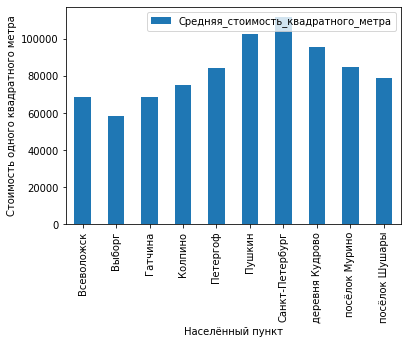

In [168]:
square_meter_locality_name_max = data.query('locality_name in @locality_name_max.index').pivot_table(index = 'locality_name',
                                                             values = 'square_meter_price',
                                                             aggfunc = 'mean')
square_meter_locality_name_max = square_meter_locality_name_max.rename(columns = {'square_meter_price' : 'Средняя_стоимость_квадратного_метра'})
square_meter_locality_name_max.plot(kind = 'bar')
plt.xlabel('Населённый пункт')
plt.ylabel('Стоимость одного квадратного метра')
square_meter_locality_name_max

Теперь выведу населённые пункты с самой высокой и низкой стоимостью квадратного метра:

In [169]:
max_ = square_meter_locality_name_max.max()[0] # считаем максимум стоимости квадратного метра площади и кладем в переменную max_
min_ = square_meter_locality_name_max.min()[0] # считаем минимум стоимости квадратного метра площади и кладем в переменную min_

# теперь делаем срез нашей сводной таблицы, чтобы выдало индекс строки (т.е. название населённого пункта), 
# в которой встретится значение максимума стоимости квадратного метра площади и кладем в переменную locality_name_max_mean_sq_m
locality_name_max_mean_sq_m = square_meter_locality_name_max.query('Средняя_стоимость_квадратного_метра == @max_').index[0]

# аналогично для минимума
locality_name_min_mean_sq_m = square_meter_locality_name_max.query('Средняя_стоимость_квадратного_метра == @min_').index[0]

# выводим на экран

print(f'Максимум стоимости квадратного метра площади, равный {max_:.0f} рублей, в населенном пункте {locality_name_max_mean_sq_m}\
\nМинимум стоимости квадратного метра площади, равный {min_:.0f} рублей, в населенном пункте {locality_name_min_mean_sq_m}')

Максимум стоимости квадратного метра площади, равный 111825 рублей, в населенном пункте Санкт-Петербург
Минимум стоимости квадратного метра площади, равный 58290 рублей, в населенном пункте Выборг


##### Промежуточный итог 10

<div style="border:solid blue 5px; padding: 20px">

Среди десяти населённых пунктов с самыми высокими показателями публикаций объявлений:
- **Максимум** стоимости квадратного метра площади, равный `111825 рублей`, в `Санкт-Петербурге`
- **Минимум** стоимости квадратного метра площади, равный `58290 рублей`, в `Выборге`     
</div>

#### Средняя цена каждого километра от центра Санкт-Петербурга
Ранее я посчитал расстояние до центра в километрах. Теперь выдевыделюлите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислю среднюю цену каждого километра. 

Сделаю срез данных по Санкт-Петербургу, рассчитаю отношение стоимости квартиры на количество километров до центра (все это в срезе данных по Санкт-Петербургу) и запишу в переменную `SPB_kilometers_price`

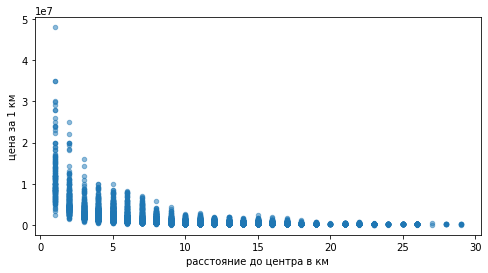

In [170]:
#data['price_per_km'] = 0
data.loc[(data['locality_name'] == "Санкт-Петербург") & (data['cityCenter_km'] > -1), 'price_per_km'] = data['last_price'] / data['cityCenter_km']
data.query('cityCenter_km > -1').plot(x = 'cityCenter_km', y = 'price_per_km', kind = 'scatter', alpha = 0.5, figsize = (8,4))
plt.xlabel('расстояние до центра в км')
plt.ylabel('цена за 1 км')
plt.show()

Видно, что самая большая стоимость за километр наблюдается для объектов, которые на расстоянии меньше пяти км до центра.
Попробую рассмотреть, что с квартирами дальше 5 км (на графике видно плохо)

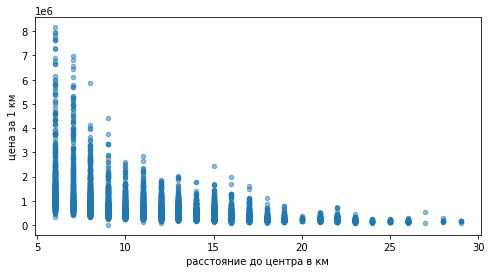

In [171]:
data.query('cityCenter_km > 5').plot(x = 'cityCenter_km', y = 'price_per_km', kind = 'scatter', alpha = 0.5, figsize = (8,4))
plt.xlabel('расстояние до центра в км')
plt.ylabel('цена за 1 км')
plt.show()

После 5 км цена снижаетсяк 20 км и остаётся очень низкой, примерно на том же уровне (падение стоимости практически гиперболическое).

То есть, общий вывод в том, что чем ближе к центру, тем дороже квартира (звучит логично)

##### Промежуточный итог 11

<div style="border:solid blue 5px; padding: 20px">

Видно, что самая большая стоимость за километр наблюдается для объектов, которые на расстоянии меньше пяти км до центра. После 5 км цена снижаетсяк 20 км и остаётся очень низкой, примерно на том же уровне (падение стоимости практически гиперболическое). При этом наблюдается большой разброс цен для квартир ближе к центру, что может объясняться:
1. Просто большим количеством предложений по квартирам в пределах 5 км от центра (и, соответственно, разброс цен выше)
2. Большей вариабельностью их цен

**Вывод**:`чем ближе к центру, тем дороже квартира` (звучит логично)
</div>

### Общий вывод
По шагам:

#### **Шаг 1**.

Открыл данные, посмотрел на гистограммы, проверил пропущенные значения. 
    
Видно, что пропущенных значений много и они находятся в следующих столбцах:
- `ceiling_height` — высота потолков (м)
- `floors_total` — всего этажей в доме
- `living_area` — жилая площадь в квадратных метрах (м²)
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `balcony` — число балконов
- `locality_name` — название населённого пункта
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

На гистограммах выше видно, что распределение различных данных самое разное, видно, что есть данные, которые надо будет основательно проанализировать и поправить (например, количество комнат 10-20).

#### **Шаг 2**.

Причины появления пропусков:

- нежелание клиента раскрывать данные
- невозможность получить данные
- технические ошибки
- ошибка при копировании/сборе данных
- банальное отсутствие данных
    

Вывод: обработал все пропуски в данных, добившись отсутствия пропусков в них различными способами   
Пропуски в данных, которые я не смог восстановить, я заполнил значениями `-1`. 
    
`livin_area` и `kitchen_area` заполнил значениями относительно `total_area`:
- рассчитал, какое в среднем отношение площади кухни или площади жилой площади к общей площади
- для каждого пропуска площади кухни или жилой площади считал произведение общей площади на среднее отношение площади кухни или  жилой площади к общей площади соответственно
    
    Пропуски в `days_exposition` пришлось оставить так, чтобы потом не ломать голову над значениями с `-1`

#### **Шаг 3**.
Проверил типы данных, произвел замену некоторых из них (привел время к правильному типу `datetime`, чтобы можно было оперировать с ним, например, производить арифметические операции, а также тип столбца с балконами на целочисленный, так как не может быть не целое число балконов)

#### **Шаг 4**.
Заменил все дублирующиеся названия на правильные, а также привел к единообразному формату, заменив везде `поселок` на `посёлок`

#### **Шаг 5**.
Рассмотрел все аномальные значения в количественных столбцах:
- выяснил, есть ли аномалии в высоте потолков (от слишком низких до слишком высоких) и исправил их
- рассмотрел комнаты и балконы (их аномальные количества), удалил все данные, где их слишком много (при этом рассмотрели связь с площадями помещения, есть ли вообще место для них, исходя из наших данных)
- рассмотрел моменты несостыковки площадей (если вдруг сумма площади кухни и жилой площади больше, чем площадь общая) и исправил их
- рассмотрел аномалии в количестве этажей, где их слишком много, где несостыковки с населенными пунктами и удалил их
- удалил цены на квартиры, которые были выше 50 млн рублей, как слишком высокие
- рассмотрел аномалии в ближайших парках и водоёмах (если, например, есть в радиусе 3 км, то не превышает ли расстояние до ближайшего эти самые 3км, и наоборот, если нет ничего в радиусе 3 км, не находится ли ближайший ближе, чем 3 км)
- рассмотрел возможные аномалии с датой публикации и количеством дней публикации, посчитали разброс лет, когда заканчивались публикации (он заканчивался 2019м годом)
- наконец, рассмотрел расстояния до ближайшего аэропорта и центра города, есть ли какие-либо странности в них (в целом, данные приличные, только удалил одно значение, где расстояние до аэропорта было 0 м)

#### **Шаг 6**.
Добавил все необходимые новые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

#### **Шаг 7**.
Рассмотрели закономерности в следующих параметрах:
- **общая площадь**;
        Видно резкий подъём на где-то 25 квадратных метрах до пика общей площади от 25 до где-то 60 квадратных метров, который затем плавно падает в ноль к двумстам метрам, что говорит о том, что самые распространенные объявления касались средних по размеру квартир, скорее всего не больше двух комнат.
    
- **жилая площадь**;
        Видно три снижающихся пика с провалами между ними: пики около 18-20, 30 и 42 квадратных метров, а провалы где-то на 22 (сильный) и между 30 и 40 метрами (не очень сильный), затем плавное снижение в ноль к 160 квадратным метрам
- **площадь кухни**;
        Видно, что распределение по виду напоминает распределение для общей площади, максимум где-то на 5-15 квадратных метрах с дальнейшим довольно резким снижением в ноль к 70 метрам, что подходит под размеры квартир, которые самые распространенные на продаже (то есть, данные общей площади, жилой площади и площади кухни дополняют друг друга)
- **цена объекта**;
        Видно, что распределение стоимости объекта очень похоже на распределение общей площади объекта, что может сигнализировать о связи этих величин через такой параметр как `цена квадратного метра`, при этом выборка у нас крупная, поэтому даже сильные различия в цене квадратного сглаживаются.
        А так пик стоимости приходится на цену до 10 млн рублей, с максимумов в точке около 4-6 млн, с дальнейшим постепенным снижением в ноль к 40-50 млн рублей. И это тоже говорит в пользу связи с самыми популярными предложениями на рынке
- **количество комнат**;
        Видно, что количество квартир с одной комнатой и двумя примерно одинаковое и максимальное, далее чуть меньше (процентов на 25) квартир с 3 комнатами, а квартир с 4 и 5 комнатами совсем мало (раз в 8 и в 30 меньше соответственно, чем 1- или 2-хкомнатных), что в очередной раз подтверждает данные по площадям помещений.
- **высота потолков**;
        Распределение выглядит довольно рвано, выделяются несколько максимумов - 2.5, 2.6 и 3 м, после трех метров значений практически нет, между 2.5 и 2.6 метрами есть некоторые данные, между 2.6 и 3 метрами также практически нет данных, что говорит в пользу высокой стандартизации этого параметра.
- **этаж квартиры**;
        Видно, что на первых пяти этажах находится примерно одинаковое количество помещений, с небольшим пиком на втором этаже, с шестого по 9й этажи раза в 2,5-3 меньше, чем на этажах 1-5, далее этажи 10-12 примерно одинаково и раза в два меньше, чем на 6-9 этажах, потом еще где-то на 25 процентов меньше на этажах 13-16, а далее уже практически по нисхожящей до 25 этажа. Возможно, данные отражают количество этажей в зданиях, т.е. больше всего пятиэтажек, затем идут девятиэтажки, двенадцатиэтажки, шестнадцатиэтажки и т.д.
- **тип этажа квартиры («первый», «последний», «другой»)**;
        Видно, что на первом и последнем этажах расположено примерно одинаковое количество помещений, при этом их раз в 5-6 меньше, чем на других этажах (других этажей банально больше)
- **общее количество этажей в доме**;
        Видно характерные пики на 5, 9, 12, 16 и 25 этажах - между ними очень мало значений, что, скорее всего, говорит о типовых постройках - пятиэтажки, девятиэтажки, двенадцатиэтажки и т.д. Зданий с другим количеством этажей меньше, поэтому их в распределении мало
- **расстояние до центра города в метрах**;
        Видно, что данные разбросаны неоднородно, однако, можно выделить, что большинство из имеющихся данных расположено в пределах 20 км от центра ближайшего города, с двумя пиками на 4-6 и 10-18 км, что, возможно, говорит, что есть несколько крупных населенных пунктов-городов с большим количеством публикаций квартир, и их поперечные размеры не превышают 8-12 и 20-36 км (если, к примеру, взглянуть на поперечные размеры Санкт-Петербурга, то получаем как раз около 30-40 км +, конечно, не забываю, что есть данные и на расстояние до центра под 30 км, что ещё больше вписывается в размеры Петербурга). В данном пункте также привел количество предложений по населенным пунктам и на них видно, что Петербург является безоговорочным лидером по количеству предложений, и, собственно, размерам, что подтверждается данными гистограммы.
- **расстояние до ближайшего аэропорта**;
        Видно, что абсолютное большинство помещений находятся в 10-50 км от аэропорта, пик данных характерен где-то для 15-25 км, что, скорее всего, снова благодаря Петербургу, так как и предложений оттуда больше всех, и от противоположного аэропорту края города до аэропорта как раз 15-25 км
- **расстояние до ближайшего парка**;
        Видим, что большинство помещений располагается в пределах 0,8 - 1 км от парка, после чего, резкое падение в ноль. Возможно, снова благодаря Петербургу, так как большинство предложений оттуда, а они на определенном расстоянии от его центра, но и парков в Питере много не в центре города, а на окраинах
- **день и месяц публикации объявления**.
        Видно, что большинство публикаций приходится на будние дни с падением в примерно два раза в выходные, минимум среди будних дней - понедельник, максимум - вторник и четверг, среда и пятница примерно одинаково чуть ниже максимума. Среди всех дней минимум - воскресенье. Если взглянуть на месяцы, то видим, что активность выпуска объявлений неоднородная в течение года. Максимум приходится на февраль и март, минимум - май и январь. В летние месяцы активность примерно одинаковая с линейным повышением в течение осени и дальнейшим падением в декабре.

#### **Шаг 8**.
Продажа квартиры в среднем занимает полгода (180 дней), характерно что-то вроде распределения Пуассона, максимум плотности продаж приходится на сроки от 45 до 231 дней, самая долгая продажа длилась 1580 дней (около 4х лет), в целом, дума, долгими можно назвать продажи, которые выходят за третий квартиль (дольше 230 дней), а быстрыми, которые меньше первого квартиля (меньше 45 дней). Пик продаж приходится на 45 дней с момента публикации, далее идут 60 и 7 дней.

Пики 45 и 60 дней, вероятно, могут быть связаны с какими-либо особенностями оформления продажи, может, что-то с риелторскими делами, которые могут занимать определённое количество дней. Также это могут быть особенности работы сайта(-ов) по продаже недвижимости - например, ограниченное время публикации - 45 и 60 дней, а время публикации может быть связано со статусом пользователя: обычный или премиум.

#### **Шаг 9**.
Рассмотрел зависимость общей стоимости объекта от:
- **общей площади**;
        Видно, что самая большая плотность у нас в области квартир 30 квадратов, стоимостью около 3 млн руб, при этом видимые очаги плотности в диапазоне от 30 до 50 квадратов (видимо, самые популярные варианты), стоимостью от 2 до 5 млн руб. То есть, лучше всего продавались квартиры либо маленькие, либо средние по общей площади. В целом, заметен очень большой разброс цен на большие площади квартир, и более скученные значения на меньших площадях
    
- **жилой площади**;
        Видно два небольших пятна, с максимумом плотности в одном из них, приходящееся на жилую плозадь от 15 до 20 квадратов стоимостью от двух до 5 млн, и второе пятно, где-то 25-30 квадратов стоимостью от 4 до 6 млн (это сильно похоже на то, что самые популярные варианты - небольшие квартиры - однушки и двушки, а их стоимость похожа на распределние стоимости квартир по общей площади помещения. Аналогично общей площади - большой разброс цен на большие жилые площади и более скученные для меньших площадей
    
- **площади кухни**;
        Видно, что самые распространенные варианты - кухня около 5-10 квадратов в квартире за 3-5 млн рублей, что в принципе немного похоже на данные по общей площади квартир в ценовом диапазоне, при этом такие размеры кухни неплохо вписываются в площади квартир за эту цену (если посмотреть на вывод по зависисмости цены от общей площади). 
    
    > Опять же все вышеперечисленные зависимости от площади говорят о том, что самые популярные варианты на продажу - небольшие квартиры, при этом стоимость эттих квартир, скорее всего, не очень сильно варьирует, вследствие высокой конкуренции на рынке (таких предложений банально много).
    
- **количества комнат**;
        По таблице и графикам очень хорошо видно, что больше всего продавали однушки и двушки (что хорошо подходит под наши предыдущие вывод о площадях квартир), чуть хуже продаются трешки, и, совсем плохо 4х и пятикомнатные квартиры. При этом по стоимости, конечно, видно, что чем больше комнат, тем цена выше (и среднее, и медианное значение), при этом среднее значение во всех случаях выше медианного, видимо, в силу выбросов с высокой стоимостью, которых много было видно на диаграммах по площадям квартир.
    
- **этажа, на котором расположена квартира**;
        Если смотреть медианные значения для типов этажей, получается не очень наглядно, так как они все практически одинаковые (хотя это может наталкивать на мысль, что стоимость практически не зависит от типа этажа, хотя первый и последний этажи стоят немного дешевле, чем другой, при этом минимум стоимости находится на первом этаже, что в принципе может быть связано с особенностями жизни на нём). На гистограммах стоимостей квартир для каждого типа этажа отдельно видно, что распределение цен очень похожего вида для каждого типа этажей, что, в принципе, подтверждает предыдущий вывод. При этом на гистограмме общего вида видно, что продажи квартир на других этажах раз в 6-7 выше, чем на первом или последнем этаже, а между собой первый и последний этажи очень похожи. При этом разброс цен на квартиры первого и последнего этажей примерно одинаковое, а вто время как на других этажах он гораздо больше.      
    
- **даты размещения**;
        Стоимость квартиры не зависит ни от дня недели публикации объявления, ни от месяца, есть небольшой выброс с годом публикации: только в одном году (2014 - самый первый в наших данных), медианная стоимость квартир отличается от остальных (самая высокая), остальные года цена изменялась очень слабо
    
    
**ОБЩИЙ ВЫВОД ПО ЭТОМУ ПУНКТУ**
        
    Больше всего на стоимость квартиры влияют её площади (общая, жилая, площадь кухни), а также количество комнат (все эти четыре параметра между собой очень тесно связаны, что лишь подтверждает этот вывод), ни этаж, ни дата публикации практически не влияют на стоимость, что логично (хрущевка в понедельник - та же хрущевка в воскресенье, цена от этого у неё краше не станет). Ожидалось, что будет какая-то зависимость от года публикации просто вследствие того, что цены на квартиры стабильно идут вверх, но этого практически не было видно по данным.

#### **Шаг 10**.
Среди десяти населённых пунктов с самыми высокими показателями публикаций объявлений:
- **Максимум** стоимости квадратного метра площади, равный `111825 рублей`, в `Санкт-Петербурге`
- **Минимум** стоимости квадратного метра площади, равный `58290 рублей`, в `Выборге`     

#### **Шаг 11**.
Рассмотрел зависисмость стоимости одного километра до центра города от расстояния до центра города. Видно, что самая большая стоимость за километр наблюдается для объектов, которые на расстоянии меньше пяти км до центра. После 5 км цена снижаетсяк 20 км и остаётся очень низкой, примерно на том же уровне (падение стоимости практически гиперболическое). При этом наблюдается большой разброс цен для квартир ближе к центру, что может объясняться:
1. Просто большим количеством предложений по квартирам в пределах 5 км от центра (и, соответственно, разброс цен выше)
2. Большей вариабельностью их цен
**Вывод**:`чем ближе к центру, тем дороже квартира` (звучит логично)

#### ВЫВОД

- Стоимость квартиры зависит от площади (общей, кухонной, жилой), количества комнат (все эти признаки тесно взаимосвязаны и подтверждают друг друга)
- Стоимость не зависит от даты публикации (ожидалась зависимость от года публикации, но в данных по году вышло так, что есть выброс в 2014 году, но, скорее всего, из-за того, что публикаций в 2014 году меньше раз в 10) и этажа
- Стоимость зависит от населенного пункта, в котором объект находится (в Санкт-Петербурге она выше, чем, например, в Выборге)
- Стоимость зависит от расстояния до центра - чем ближе, тем дороже
- В среднем продажа квартиры занимает полгода, чаще всего продают за месяц-полтора
